# 1. Introduction

Most of code written in this section is just setting up the notebook as well as my utils object for the rest of the notebook.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import itertools
plt.style.use('seaborn')

## My own written Utils class
This is a helper class, that automates some of my code.

In [5]:
class Utils:
    def __init__(self):
        pass
    def describeQuan(self, arr):
        '''
        Prints numerical summary of the given numpy array arr
        '''
        min = arr.min()
        max = arr.max()
        mean = arr.mean()
        varr = arr.var()
        std = arr.std()
        count = np.count_nonzero(arr)
        print('The number of elements is: {:15}\nThe min is: {:30}\nThe max is: {:30}\nThe mean is: {:29.2f}\nThe variance is: {:25.2f}\nThe standard deviation is: {:15.2f}'.format(count, min, max, mean, varr, std))
        print()
        return [min, max, mean, varr, std, count]
    
    def describeQual(self, arr):
        '''
        Prints qualitative summary of the data. Accepts a col with quantitative data
        '''
        unique_values, u_pos = np.unique(arr, return_inverse=True)
        num_unique = len(unique_values)
        u_counts = np.bincount(u_pos)
        u_maxpos = u_counts.argmax() 
        count = np.count_nonzero(arr) # Counts number of elements
        fre_elem = unique_values[u_maxpos].tolist()
        count_fre_elemm = u_counts[u_maxpos].tolist()
#         print(type(count_fre_elemm))
        print('Count of elements: {:20}\nNumber of unique values: {:14}\nUnique values: {}\nMost frequent elemnt: {:>17}\nCount of most frequent element: {:7}'.format(count, num_unique, unique_values, fre_elem, count_fre_elemm))
        print()
        return [count, num_unique, unique_values[u_maxpos], u_counts[u_maxpos]]
        
    
    def convertColDate(self, data, col_name):
        '''
        Takes in a numpy array and column name in the numpy array to convert to datetime
        '''
        datetime_col = np.array(data[col_name], dtype=np.datetime64)
        return datetime_col
    
    def grpBy(self, data, grp_col):
        '''
        Custom groupby function.
        Also sorts by the grp col
        '''
        u_v = np.unique(data[grp_col])
        rtr_data = [data[data[grp_col] == i] for i in u_v]
        return rtr_data
 
    def coeGrpBy(self, data, datetime, aggr_col): 
        datetime_u = np.unique(datetime)
        a = [data[datetime == i][aggr_col].sum() for i in datetime_u]
        return a

    def customMerge(self, left, right, left_on=None, right_on=None, on=None):
        '''
        Custom merge function
        '''
        if (right_on is not None) and (left_on is not None):
            left_mask = np.isin(left[left_on], right[right_on])
            right_mask = np.isin(right[right_on], left[left_on])
            return [left[left_mask], right[right_mask]]
        elif on is not None:
            left_mask = np.isin(left[on], right[on])
            right_mask = np.isin(right[on], left[on])
            return [left[left_mask], right[right_mask]]
        
    def getCustomUnique(self, data):
        '''
        Custom unique function that keeps order
        '''
        [sorted_values, index] = np.unique(data, return_index=True)
        unique = [sorted_values[i] for i in index]
        return unique
        
        
        
    def subplots(self, arr, labels = None, figsize = None):
        
        '''
        Takes in an arr with [(x_arr, y_arr), ...] to plot in subplots 
        Additional params with, labels = [l1, l2, ...], figsize = (10, 10) 
        '''
        if figsize is not None:
            fig, ax = plt.subplots(len(arr), 1, figsize=figsize)
        else:
            fig, ax = plt.subplots(len(arr), 1, figsize=(15, 15))
        for i, (x, y) in enumerate(arr):
            ax[i].plot(x, y)
            if labels is None:
                ax[i].set_title(labels[i], pad=10)
        return fig, ax
    
    def getDistoPlot(self, data, labels, figsize=None, format='%i'):
        '''
        Custom function to get distrubution plots
        data = [[series one], ...]
        labels = [series_1, series_2, ...]
        figsize = (10, 10)
        '''
        if figsize is not None:
            fig, ax = plt.subplots(len(data), 3, figsize=figsize)
        else:
            fig, ax = plt.subplots(len(data), 3, figsize=(25, 20))
        for i, (a, d, label) in enumerate(zip(ax, data, labels)):
            # Histo
            a[0].hist(d)
            a[0].set_title(label, fontsize=15)
            # Boxplot
            bp_dict = a[1].boxplot(d, patch_artist=True)
#             a[1].set_xticklabels([label])
            a[1].set_title(label, fontsize=15)
            for line in bp_dict['medians']:
                x, y = line.get_xydata()[1]
                a[1].text(x+0.1, y, format % y,
                     horizontalalignment='center', fontsize=15)
            for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                plt.setp(bp_dict[element], color='blue')

            for patch in bp_dict['boxes']:
                patch.set_facecolor('cyan')  
            # Violin
            vp_dict = a[2].violinplot(d, showextrema=True, showmedians=True)
#             a[2].set_xticklabels([label])
            a[2].set_title(label, fontsize=15)
            # Setting font size of xlabels
            a[0].tick_params(labelsize=13)
            a[1].tick_params(labelsize=13)
            a[2].tick_params(labelsize=13)
        return fig, ax

    def resetxlabels(self, ax):
        num_labels = len(ax.get_xticklabels())
        ax.set_xticklabels([''] * num_labels)
        return ax
    
    def bigplot(self, arr, legends):
        ax = plt.subplot(111)
        for (x, y), legend in zip(arr, legends):
            ax.plot(x, y, label=legend)
        return ax
            
utils = Utils()
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))

# Loading Data

In [6]:
# coe_results = np.genfromtxt('data/coe-results.csv', dtype=['U50', 'i8', 'U50', 'i8', 'i8', 'i8', 'i8'], delimiter=',', names=True)
coe = np.genfromtxt('data/coe-results.csv', dtype=['U50', 'i8', 'U50', 'i8', 'i8', 'i8', 'i8'], delimiter=',', names=True)
pub_trips = np.genfromtxt('data/public-transport-utilisation-average-public-transport-ridership.csv', dtype=['U10, U10, i8'], delimiter=',', names=True)
pub_dist = np.genfromtxt('data/public-transport-utilisation-average-trip-distance.csv', dtype=['U10', 'U10', 'f8'], delimiter=',', names=True)
all_motor_veh = np.genfromtxt('data/ann_veh_pop.csv', dtype=['U50', 'U50', 'U50', 'i8'], delimiter=',', names=True)

In [7]:
# Custom dtype for pub_trips
dtype = [('year', 'U10'), ('mode', 'U10'), ('trips', 'i8')]
pub_trips = [i[0] for i in pub_trips.tolist()]
pub_trips = np.array(pub_trips, dtype = dtype)

# Looking at public transport

In [8]:
print('Trips dataset\n', pub_trips[:5], '\n', pub_trips.dtype.names) 
print('Average distance per trip dataset\n', pub_dist[:5], '\n', pub_dist.dtype.names)

Trips dataset
 [('1995', 'MRT',  740000) ('1995', 'LRT',       0)
 ('1995', 'Bus', 3009000) ('1995', 'Taxi',       0)
 ('1996', 'MRT',  850000)] 
 ('year', 'mode', 'trips')
Average distance per trip dataset
 [('2004', 'MRT', 11.5) ('2004', 'LRT',  0. ) ('2004', 'Bus',  5.2)
 ('2004', 'Taxi',  8.5) ('2005', 'MRT', 11.5)] 
 ('year', 'mode', 'ave_distance_per_trip')


In [9]:
print('Stats for Public trips dataset')
print('Stats for column year')
utils.describeQual(pub_trips['year'])
print('Stats for column trips')
print('Stats for column mode')
utils.describeQual(pub_trips['mode'])
utils.describeQuan(pub_trips['trips'])
print()

Stats for Public trips dataset
Stats for column year
Count of elements:                   88
Number of unique values:             22
Unique values: ['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016']
Most frequent elemnt:              1995
Count of most frequent element:       4

Stats for column trips
Stats for column mode
Count of elements:                   88
Number of unique values:              4
Unique values: ['Bus' 'LRT' 'MRT' 'Taxi']
Most frequent elemnt:               Bus
Count of most frequent element:      22

The number of elements is:              78
The min is:                              0
The max is:                        3939000
The mean is:                    1402852.27
The variance is:          1625720944085.74
The standard deviation is:      1275037.62




In [10]:
print('Stats for Public trips dataset')
print('Stats for column year')
utils.describeQual(pub_dist['year'])
print('Stats for column mode')
utils.describeQual(pub_dist['mode'])
print('Stats for column average distance per trip')
utils.describeQuan(pub_dist['ave_distance_per_trip'])
print()

Stats for Public trips dataset
Stats for column year
Count of elements:                   44
Number of unique values:             11
Unique values: ['2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014']
Most frequent elemnt:              2004
Count of most frequent element:       4

Stats for column mode
Count of elements:                   44
Number of unique values:              4
Unique values: ['Bus' 'LRT' 'MRT' 'Taxi']
Most frequent elemnt:               Bus
Count of most frequent element:      11

Stats for column average distance per trip
The number of elements is:              40
The min is:                            0.0
The max is:                           11.5
The mean is:                          6.50
The variance is:                     14.23
The standard deviation is:            3.77




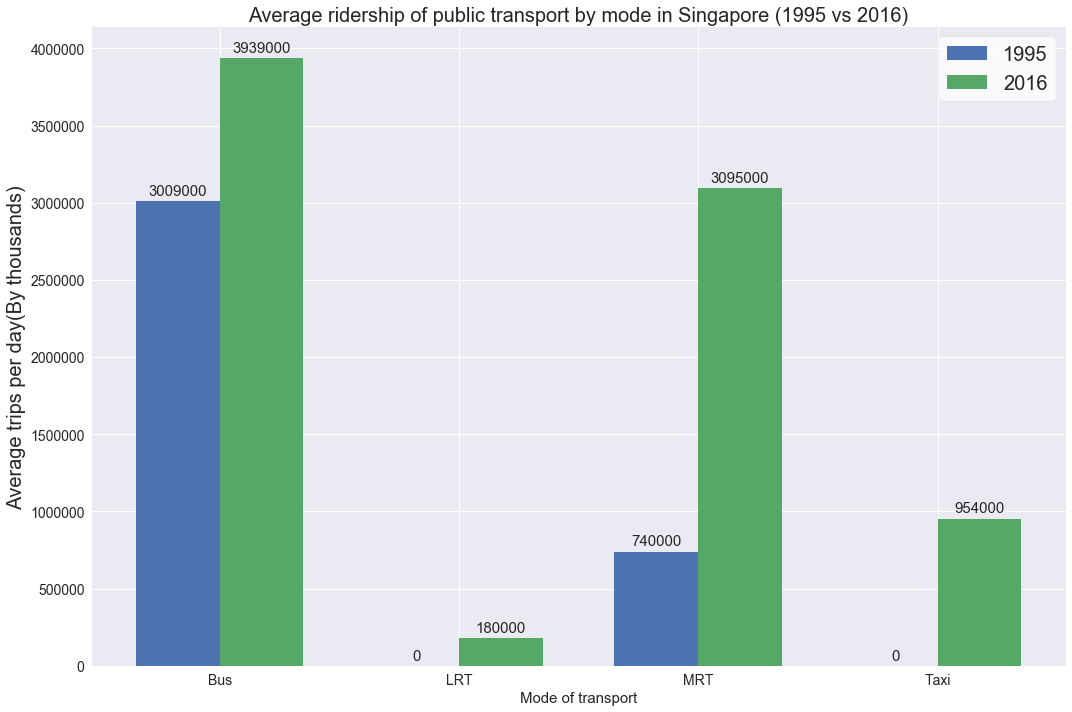

In [11]:
'''
    Initial look at the data, is there a change from the current year and last year
'''
trips_mode = utils.grpBy(pub_trips, 'mode')
trips_mode_first = [trips[0] for trips in trips_mode]
trips_mode_last = [trips[-1] for trips in trips_mode]

first_year = np.unique(trips_mode_first[0]['year'])[0]
last_year = np.unique(trips_mode_last[0]['year'])[0]

categories = np.unique(np.array(trips_mode_first)['mode'])

trips_mode_first = [trips['trips'] for trips in trips_mode_first]
trips_mode_last = [trips['trips'] for trips in trips_mode_last]

x = np.arange(len(categories))
width = 0.35

fig, (ax)= plt.subplots(1, 1, figsize=(15, 10))
first = ax.bar(x-width/2, trips_mode_first, width, label=first_year)
last = ax.bar(x+width/2, trips_mode_last, width, label=last_year)

ax.set_title('Average ridership of public transport by mode in Singapore ({} vs {})'.format(first_year, last_year), fontsize=20)
ax.set_ylabel('Average trips per day(By thousands)', fontsize=20)
ax.set_xlabel('Mode of transport', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(prop={'size': 20}, frameon=True).get_frame().set_facecolor('white')
ax.tick_params(labelsize=14)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        text = ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        text.set_fontsize(15)
autolabel(first)
autolabel(last)

plt.tight_layout()
plt.savefig('plots/pub_1.png')

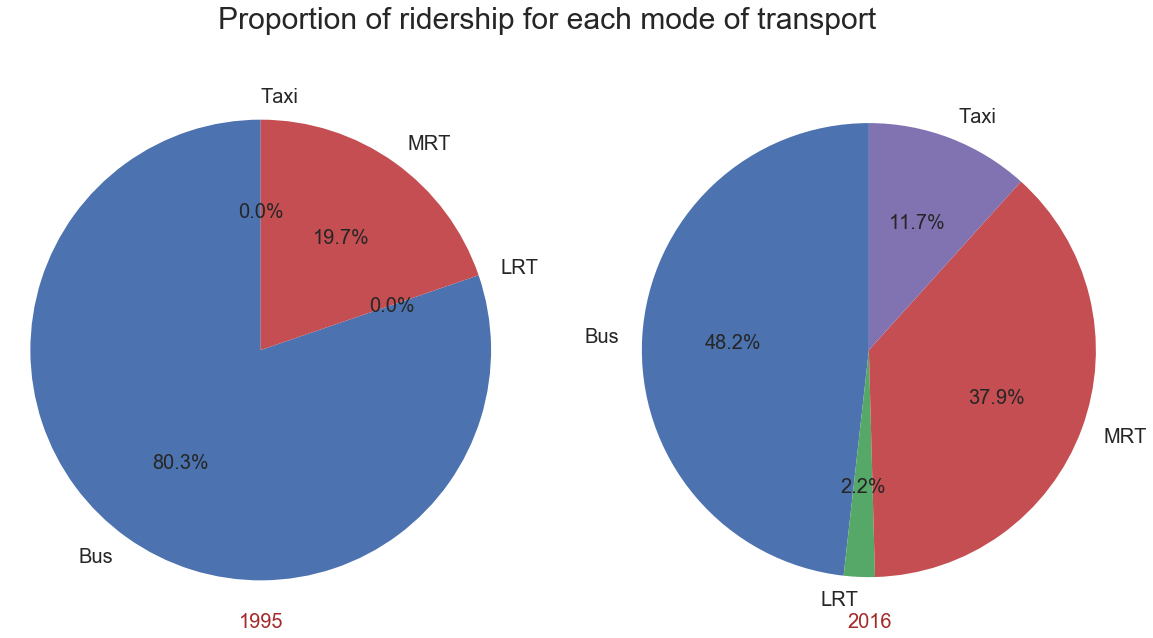

In [12]:
'''
    Pie chart of distribution of trips
'''

trips_mode_first_per = trips_mode_first / np.sum(trips_mode_first)
trips_mode_last_per = trips_mode_last / np.sum(trips_mode_last)

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax.pie(trips_mode_first_per, startangle=90, labels = categories, textprops={'fontsize': 20}, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title(first_year, fontsize=20, y=-0.02, c='brown')
fig.set_facecolor('white')


ax1.pie(trips_mode_last_per, startangle=90, labels = categories, textprops={'fontsize': 20}, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title(last_year, fontsize=20, y=-0.02, c='brown')
fig.set_facecolor('white')

fig.suptitle('Proportion of ridership for each mode of transport', fontsize=30)
plt.savefig('plots/pub_2.png')

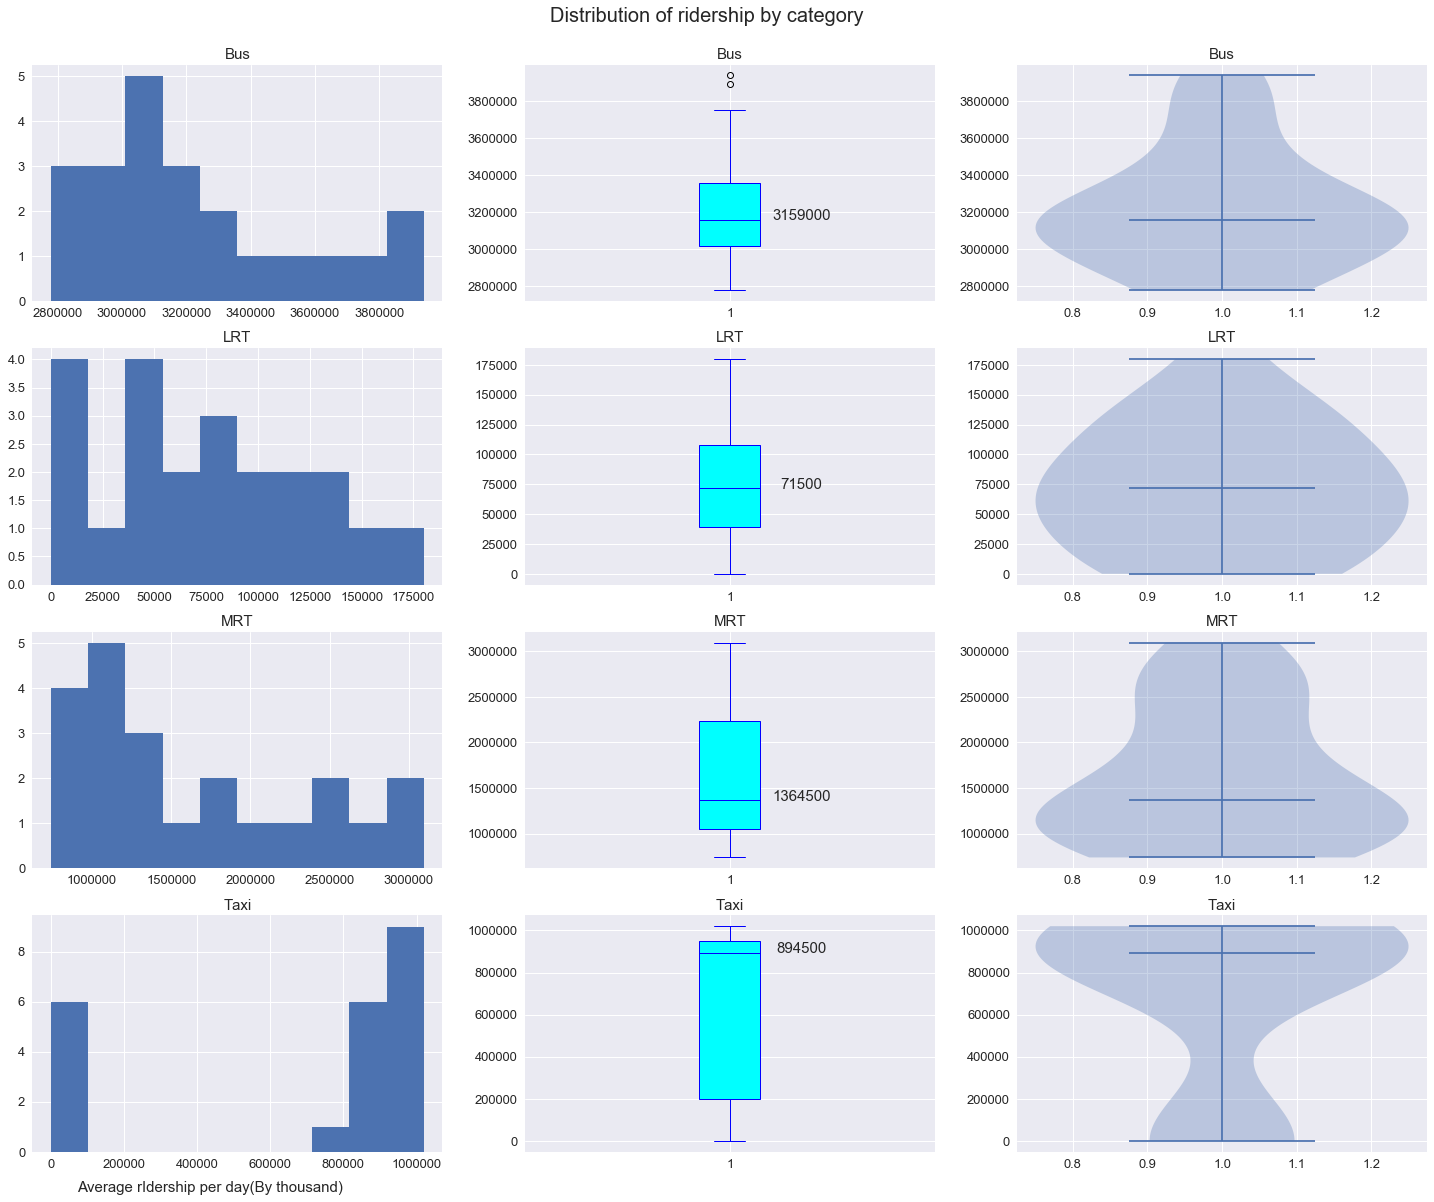

In [13]:
'''
    Distrubution of trips by mode
'''

trips_mode_trips = [trips['trips'] for trips in trips_mode]
fig, ax = utils.getDistoPlot(trips_mode_trips, categories)

fig.text(0.15, 0.1, 'Average rIdership per day(By thousand)', fontsize=15, verticalalignment='center')
fig.suptitle('Distribution of ridership by category', y = 0.92, fontsize=20)

plt.savefig('plots/pub_3.png')

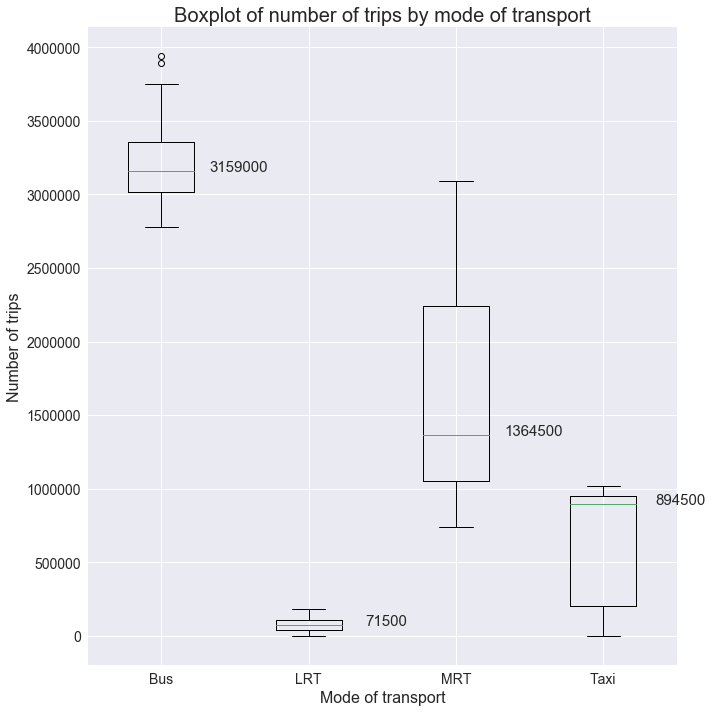

In [14]:
'''
    Distrubution of trips by mode
'''

trips_mode_trips = [trips['trips'] for trips in trips_mode]
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
bp_dict = ax.boxplot(trips_mode_trips)
ax.set_xticklabels(categories)
ax.set_xlabel('Mode of transport', fontsize=16)
ax.set_ylabel('Number of trips', fontsize=16)
ax.set_title('Boxplot of number of trips by mode of transport', fontsize=20)
ax.tick_params(labelsize=14)
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x+0.3, y, '%i' % y,
         horizontalalignment='center', fontsize=15)
plt.tight_layout()
plt.savefig('plots/pub_4.png')

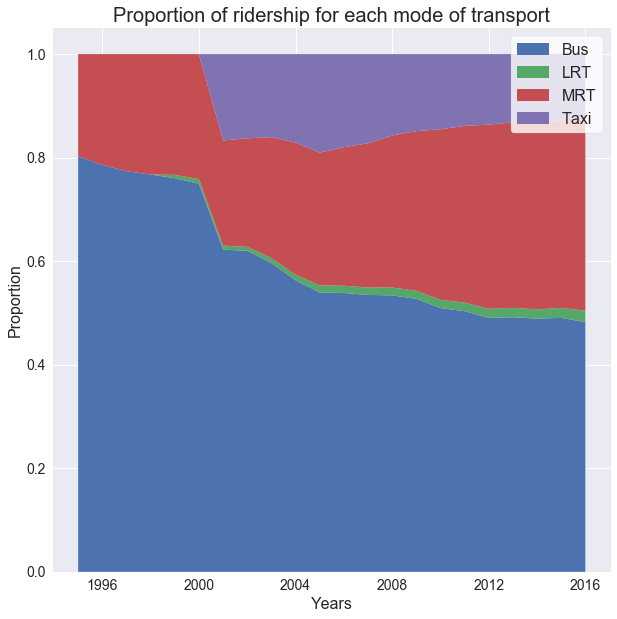

In [15]:
trips_year = utils.grpBy(pub_trips, 'year')
trips_year = [np.sort(year, order='mode') for year in trips_year]
trips_year_per = [trips['trips'] / trips['trips'].sum() for trips in trips_year]
years = np.unique(utils.convertColDate(pub_trips, 'year'))
categories = np.unique(trips_year[0]['mode'])

trips_year_per = np.array(trips_year_per)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
stack = ax.stackplot(years, trips_year_per.T, labels=categories)
ax.legend(fontsize=16, frameon=True).get_frame().set_facecolor('white')
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)
ax.set_title('Proportion of ridership for each mode of transport', fontsize=20)
ax.tick_params(labelsize=14)

plt.savefig('plots/pub_5.png')

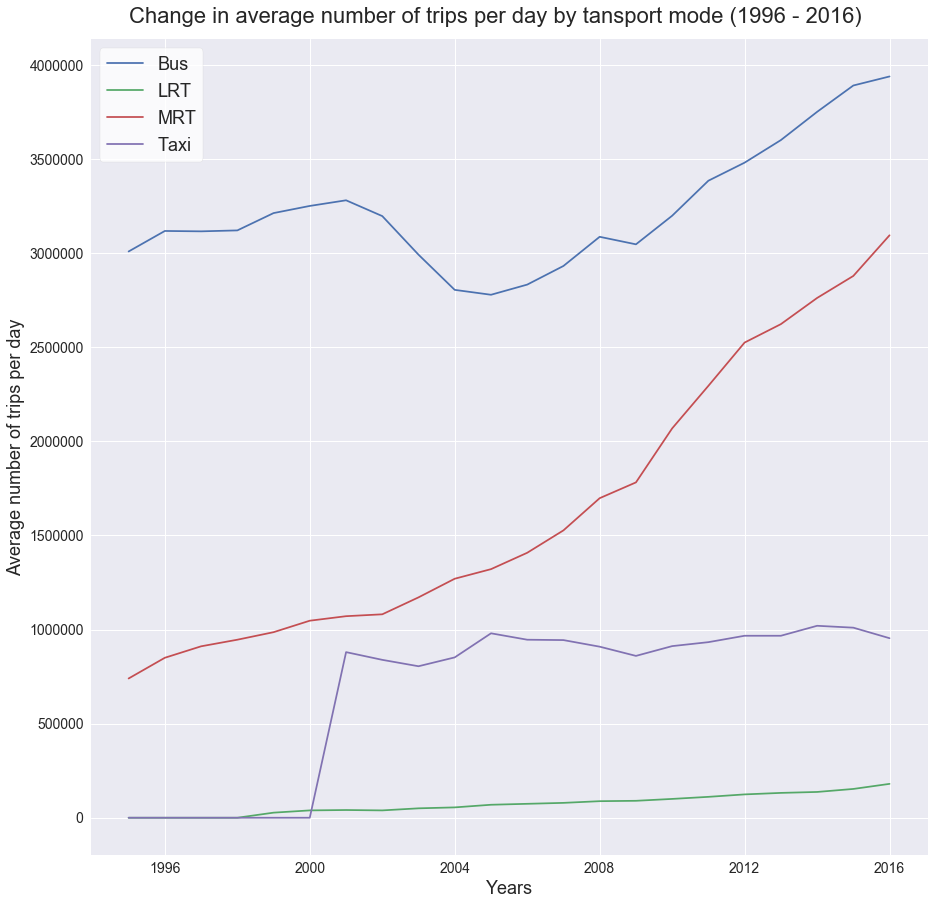

In [16]:
trips_year_trips = np.array([year['trips'] for year in trips_year])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, transport_mode in zip(range(trips_year_trips.shape[1]), categories):
    ax.plot(years, trips_year_trips[:, i], label=transport_mode)

fig.suptitle('Change in average number of trips per day by tansport mode (1996 - 2016)', y=0.91, fontsize=22)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Average number of trips per day', fontsize=18)
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')
ax.tick_params(labelsize=14)

plt.savefig('plots/pub_6.png')

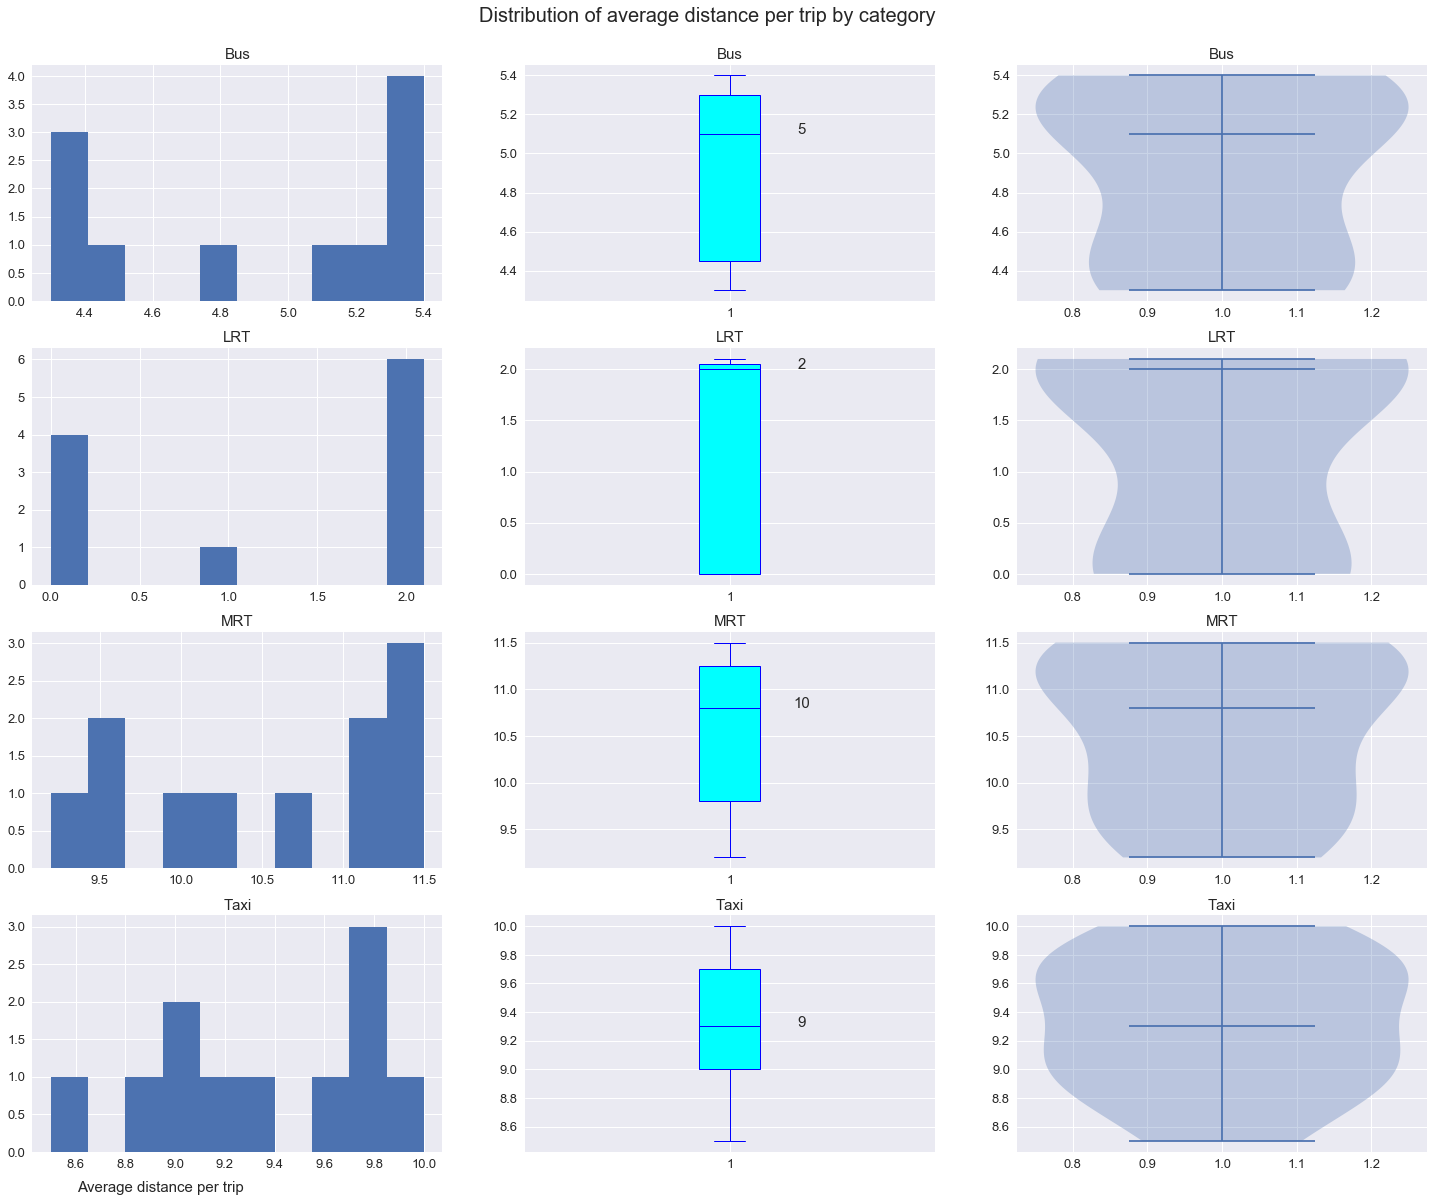

In [17]:
pub_dist_mode = utils.grpBy(pub_dist, 'mode')
modes = np.unique(pub_dist['mode'])

dist_mode_dist = [i['ave_distance_per_trip'] for i in pub_dist_mode]

fig, ax = utils.getDistoPlot(dist_mode_dist, modes)
fig.text(0.15, 0.1, 'Average distance per trip', fontsize=15, verticalalignment='center')
fig.suptitle('Distribution of average distance per trip by category', y = 0.92, fontsize=20)

plt.savefig('plots/pub_7.png')

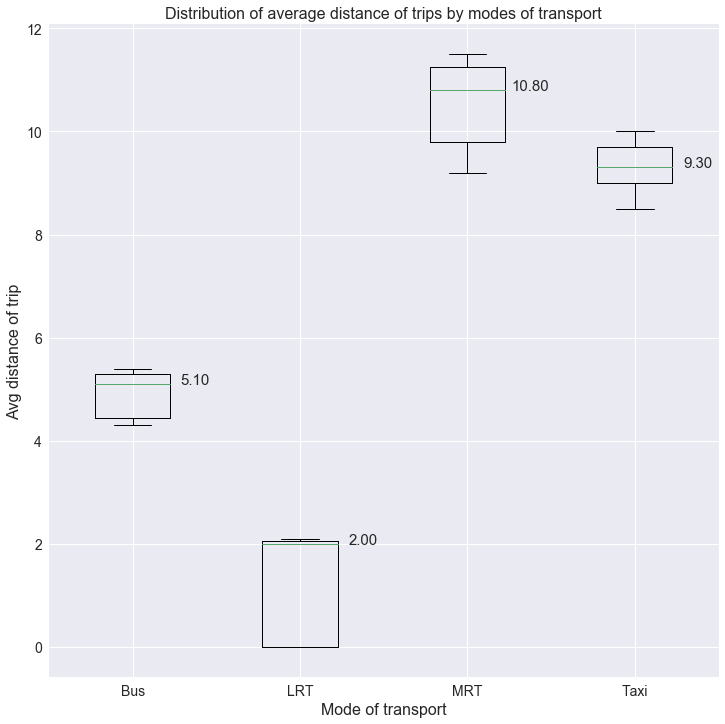

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
bp_dict = ax.boxplot(dist_mode_dist)
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x+0.15, y, '%.2f' % y,
         horizontalalignment='center', fontsize=15)
ax.set_xticklabels(modes)
ax.set_xlabel('Mode of transport', fontsize=16)
ax.set_ylabel('Avg distance of trip', fontsize=16)
ax.set_title('Distribution of average distance of trips by modes of transport', fontsize=16)
ax.tick_params(labelsize=14)

plt.savefig('plots/pub_8.png')

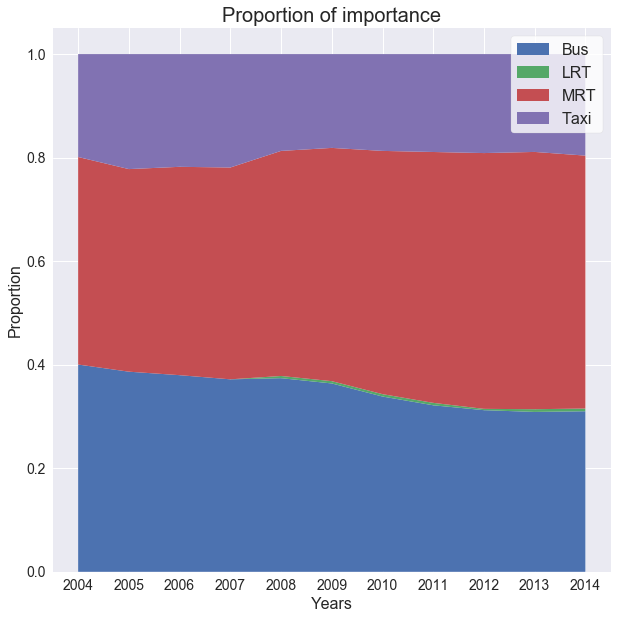

In [19]:
# Importance of each mode of transport
pub_mode_merge = utils.customMerge(pub_dist, pub_trips, on='year')
pub_dist_grp = utils.grpBy(pub_mode_merge[0], 'mode')
pub_trips_grp = utils.grpBy(pub_mode_merge[1], 'mode')
total_dist_per_year_mode = []
for dist, trips in zip(pub_dist_grp, pub_trips_grp):
    total_dist_per_year_mode.append(dist['ave_distance_per_trip'] * trips['trips'] / 1000000)
total_dist_per_year_mode = np.array(total_dist_per_year_mode)

years = np.unique(pub_mode_merge[0]['year'])
categories = np.unique(pub_mode_merge[0]['mode'])

total_dist_per_year_mode = np.array([total_dist_per_year_mode[:, i] / total_dist_per_year_mode[:, i].sum() for i in range(total_dist_per_year_mode.shape[1])])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
stack = ax.stackplot(years, total_dist_per_year_mode.T, labels=categories)
ax.legend(fontsize=16, frameon=True).get_frame().set_facecolor('white')
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)
ax.set_title('Proportion of importance', fontsize=20)
ax.tick_params(labelsize=14)

plt.savefig('plots/pub_9.png')

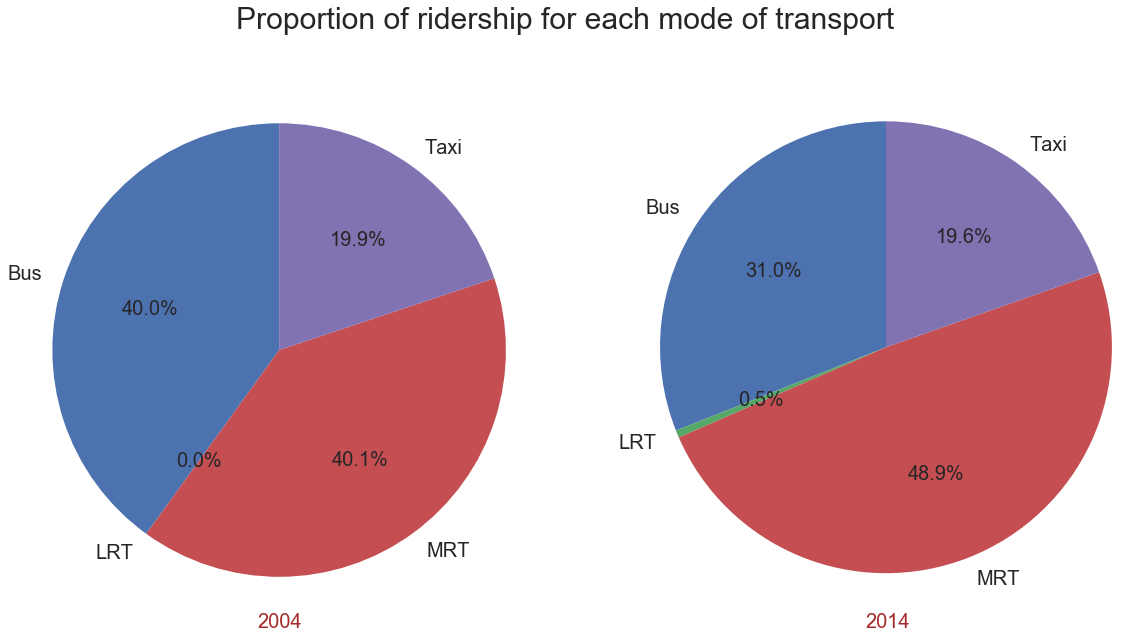

In [20]:
total_dist_first = total_dist_per_year_mode[0]
total_dist_last = total_dist_per_year_mode[-1]

first_year = years[0]
last_year = years[-1]

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax.pie(total_dist_first, startangle=90, labels = categories, textprops={'fontsize': 20}, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title(first_year, fontsize=20, y=-0.02, c='brown')
fig.set_facecolor('white')


ax1.pie(total_dist_last, startangle=90, labels = categories, textprops={'fontsize': 20}, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title(last_year, fontsize=20, y=-0.02, c='brown')
fig.set_facecolor('white')

fig.suptitle('Proportion of ridership for each mode of transport', fontsize=30)

plt.savefig('plots/pub_10.png')

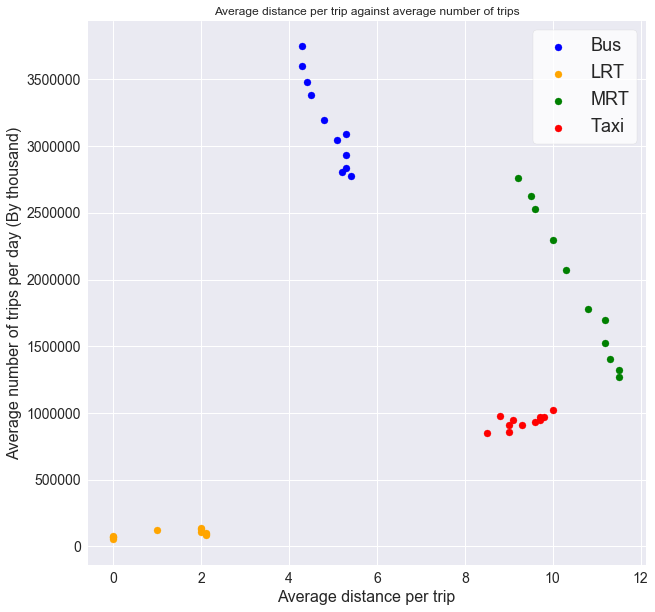

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for ave_dist, ave_trips, label, c in zip(pub_dist_grp, pub_trips_grp, categories, ['blue', 'orange', 'green', 'red']):
    ax.scatter(ave_dist['ave_distance_per_trip'], ave_trips['trips'], label=label, c=c)

# ax.scatter(pub_mode_merge[0]['ave_distance_per_trip'], pub_mode_merge[1]['trips'])
ax.tick_params(labelsize=14)
ax.set_xlabel('Average distance per trip', fontsize=16)
ax.set_ylabel('Average number of trips per day (By thousand)', fontsize=16)
ax.set_title('Average distance per trip against average number of trips')
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')

plt.savefig('plots/pub_11.png')

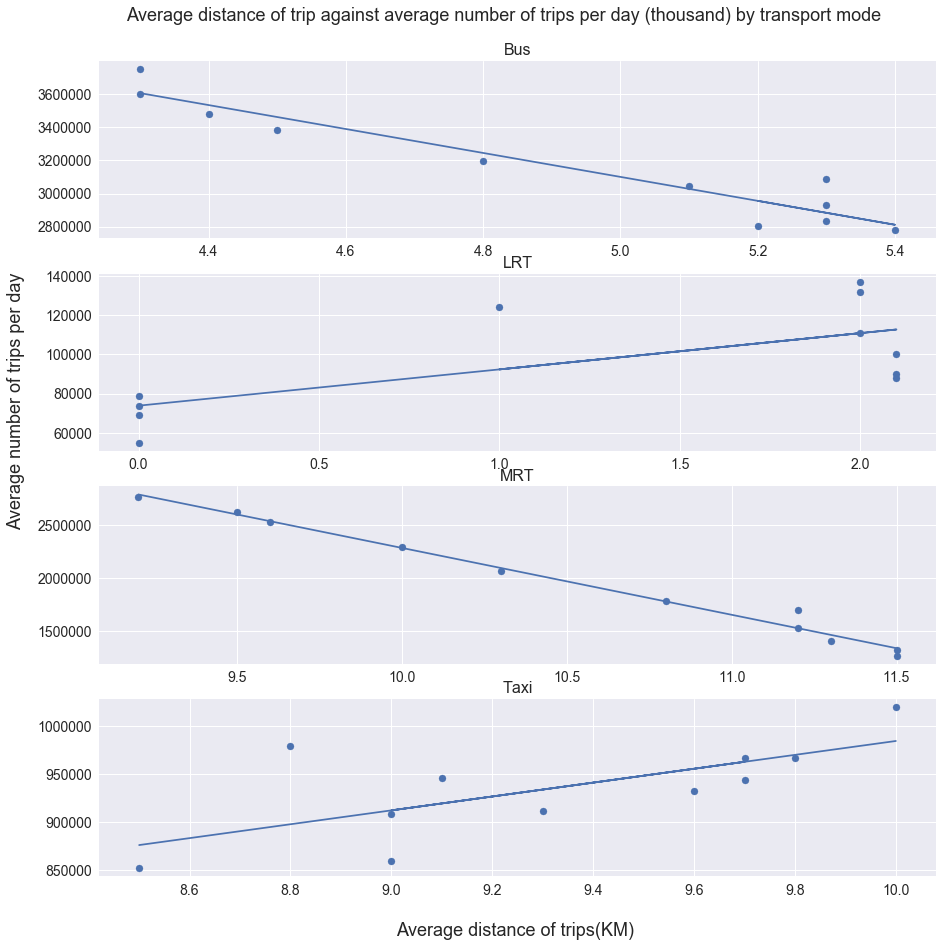

In [22]:
fig, ax = plt.subplots(len(pub_dist_grp), 1, figsize=(15, 15))
for i, (dist, trips, mode) in enumerate(zip(pub_dist_grp, pub_trips_grp, modes)):
#     ax[i].scatter(trips['trips'], dist['ave_distance_per_trip'])
    ax[i].scatter(dist['ave_distance_per_trip'], trips['trips'])
#     trend = np.polyfit(trips['trips'], dist['ave_distance_per_trip'], 1)
    trend = np.polyfit(dist['ave_distance_per_trip'], trips['trips'], 1)
    trend_line = np.poly1d(trend)
    ax[i].plot(dist['ave_distance_per_trip'], trend_line(dist['ave_distance_per_trip']))
    ax[i].set_title(mode, fontsize=16)
    ax[i].tick_params(labelsize=14)
fig.text(0.4, 0.07, 'Average distance of trips(KM)', fontdict = {'fontsize': 18})
fig.text(0.04, 0.45, 'Average number of trips per day', fontdict = {'fontsize': 18}, rotation='vertical')
fig.suptitle('Average distance of trip against average number of trips per day (thousand) by transport mode', y=0.93, fontsize=18)

plt.savefig('plots/pub_12.png')

# COE

In [23]:
print('COE dataset\n', coe[:5], '\n', coe.dtype.names)

COE dataset
 [('2010-01', 1, 'Category A', 1152, 1145, 1342, 18502)
 ('2010-01', 1, 'Category B',  687,  679,  883, 19190)
 ('2010-01', 1, 'Category C',  173,  173,  265, 19001)
 ('2010-01', 1, 'Category D',  373,  365,  509,   889)
 ('2010-01', 1, 'Category E',  586,  567, 1011, 19889)] 
 ('month', 'bidding_no', 'vehicle_class', 'quota', 'bids_success', 'bids_received', 'premium')


In [25]:
print('Stats for COE dataset')
print('Stats for column months')
utils.describeQual(coe['month'])
print('Stats for column bidding_no')
utils.describeQuan(coe['bidding_no'])
print('Stats for column vehicle class')
utils.describeQual(coe['vehicle_class'])
print('Stats for column quota')
utils.describeQuan(coe['quota'])
print('Stats for column bids_success')
utils.describeQuan(coe['bids_success'])
print('Stats for column bids_recieved')
utils.describeQuan(coe['bids_received'])
print('Stats for column premium')
utils.describeQuan(coe['premium'])
print()

Stats for COE dataset
Stats for column months
Count of elements:                 1120
Number of unique values:            112
Unique values: ['2010-01' '2010-02' '2010-03' '2010-04' '2010-05' '2010-06' '2010-07'
 '2010-08' '2010-09' '2010-10' '2010-11' '2010-12' '2011-01' '2011-02'
 '2011-03' '2011-04' '2011-05' '2011-06' '2011-07' '2011-08' '2011-09'
 '2011-10' '2011-11' '2011-12' '2012-01' '2012-02' '2012-03' '2012-04'
 '2012-05' '2012-06' '2012-07' '2012-08' '2012-09' '2012-10' '2012-11'
 '2012-12' '2013-01' '2013-02' '2013-03' '2013-04' '2013-05' '2013-06'
 '2013-07' '2013-08' '2013-09' '2013-10' '2013-11' '2013-12' '2014-01'
 '2014-02' '2014-03' '2014-04' '2014-05' '2014-06' '2014-07' '2014-08'
 '2014-09' '2014-10' '2014-11' '2014-12' '2015-01' '2015-02' '2015-03'
 '2015-04' '2015-05' '2015-06' '2015-07' '2015-08' '2015-09' '2015-10'
 '2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12'
 '2017-

In [26]:
def generateXticksCOE():
    '''
    Helper function for COE data specifically.
    Generates a list for xticks only containing years
    '''
    years = []
    curr_year = 2010
    for i in range(9):
        yr_add = curr_year + i
        years.append(yr_add)
    xticks = []
    for i in range(112):
        if(i % 12 == 0 and i/12 < len(years) ):
            xticks.append(years[int(i/12)])
        else:
             xticks.append('')
    return xticks

In [27]:
coe_months_raw = np.unique(coe['month'])
coe_months = np.unique(utils.convertColDate(coe, 'month'))
coe_vehicle_classes = np.unique(coe['vehicle_class'])
def getAggDataCoe(cols):
     return [[[month_mode[col_name].mean() if col_name == 'premium' else month_mode[col_name].sum() for month_mode in utils.grpBy(month, 'vehicle_class')]for month in utils.grpBy(coe, 'month')] for col_name in cols]

[coe_quota, coe_bids_success, coe_bids_recieved, coe_premiums] = getAggDataCoe(['quota', 'bids_success', 'bids_received', 'premium'])

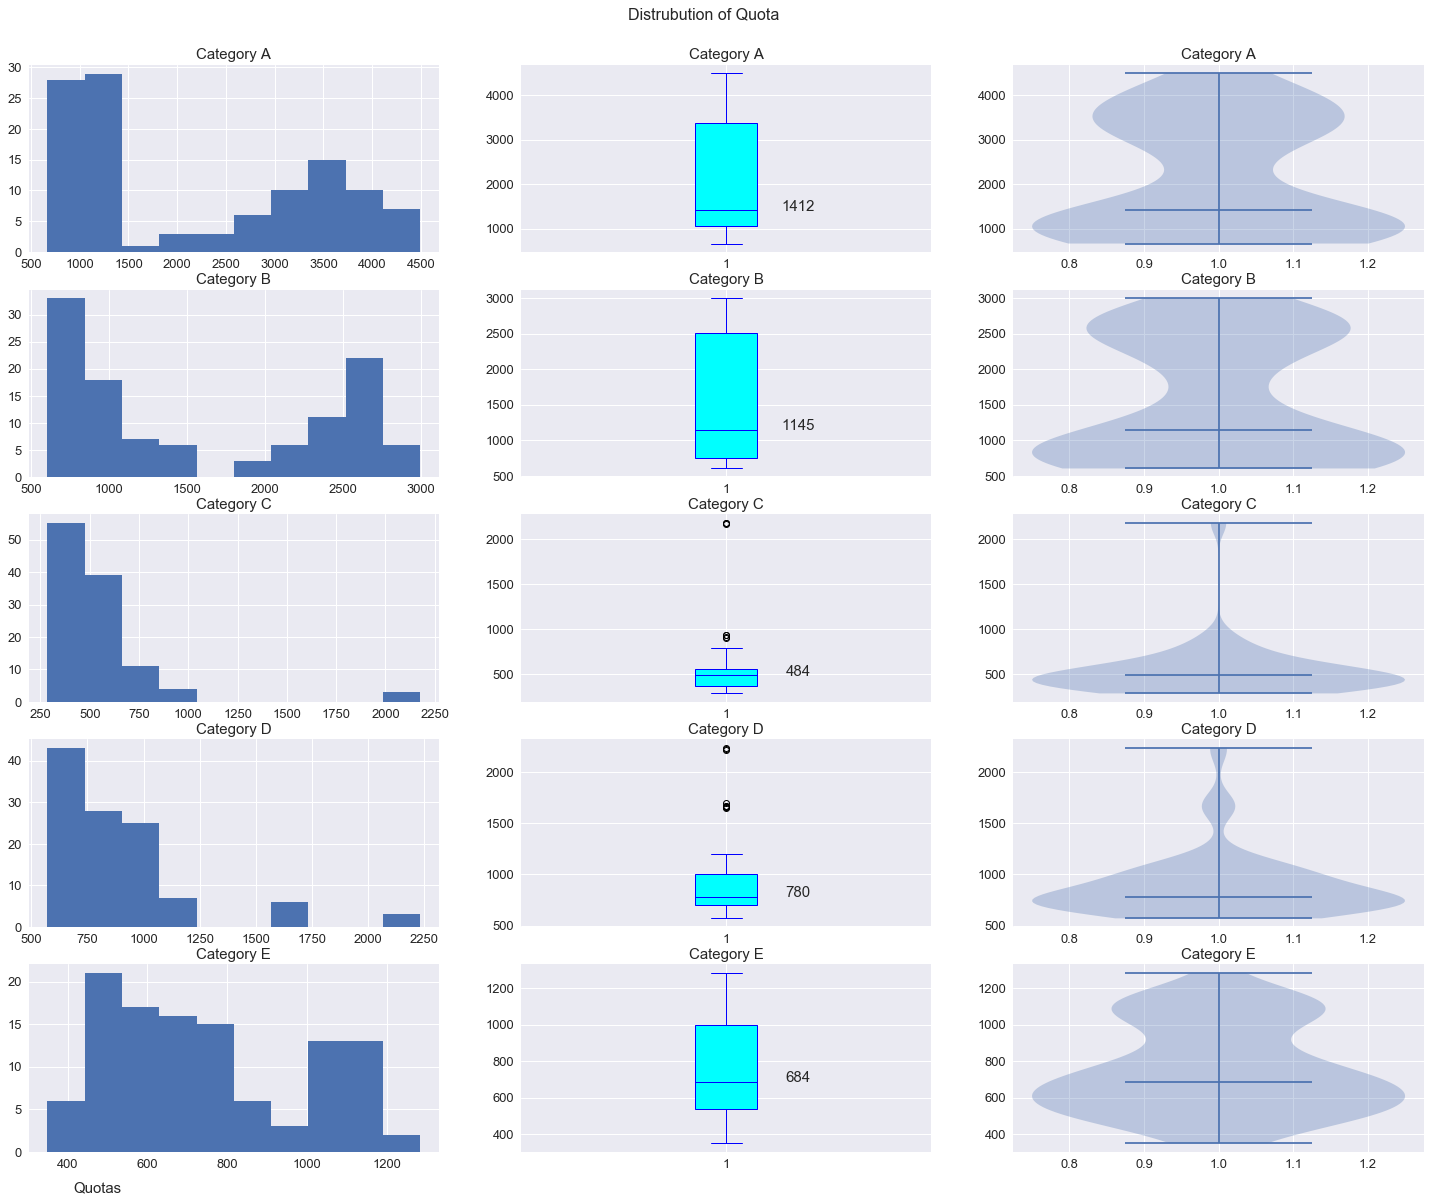

In [28]:
coe_quota = np.array(coe_quota)
quota_vehicle = [coe_quota[:, i] for i in range(len(coe_vehicle_classes))]

fig, ax = utils.getDistoPlot(quota_vehicle, coe_vehicle_classes)
fig.suptitle('Distrubution of Quota', y=0.92, fontsize=16)
fig.text(0.15, 0.1, 'Quotas', fontsize=15, verticalalignment='center')

plt.savefig('plots/coe_1.png')

# utils.getDistoPlot(coe_quota, coe_vehicle_classes)
# fig, ax = plt.subplots(coe_quota.shape[1], 2, figsize=(20, 20))
# for i, (a, vehicle_class) in enumerate(zip(ax, coe_vehicle_classes)):
#     a[0].hist(coe_quota[:, i])
#     bp_dict = a[1].boxplot(coe_quota[:, i])
#     a[0].set_title(vehicle_class)
#     a[1].set_xticklabels([vehicle_class])
#     for line in bp_dict['medians']:
#         x, y = line.get_xydata()[1]
#         a[1].text(x+0.1, y, '%i' % y,
#              horizontalalignment='center', fontsize=15)

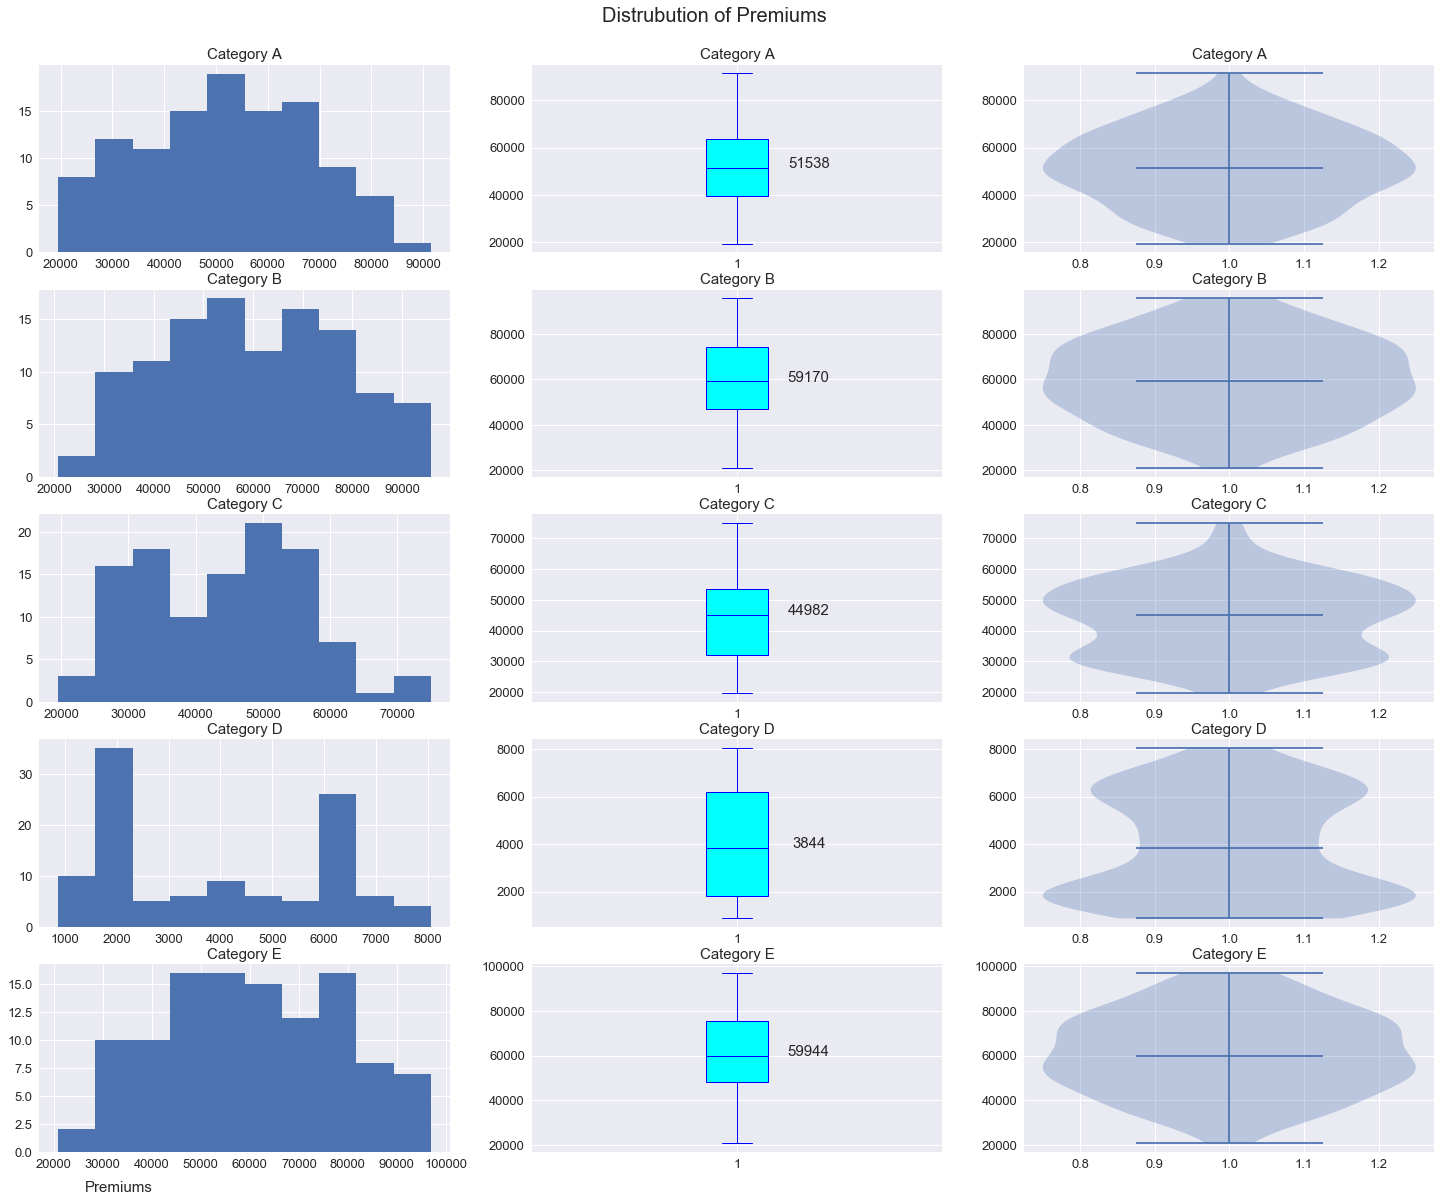

In [29]:
coe_premiums = np.array(coe_premiums)
premiums_vehicle = [coe_premiums[:, i] for i in range(len(coe_vehicle_classes))]

fig, ax = utils.getDistoPlot(premiums_vehicle, coe_vehicle_classes)
fig.suptitle('Distrubution of Premiums', y=0.92, fontsize=20)
fig.text(0.15, 0.1, 'Premiums', fontsize=15, verticalalignment='center')

plt.savefig('plots/coe_2.png')

# fig, ax = plt.subplots(coe_quota.shape[1], 2, figsize=(20, 20))
# for i, (a, vehicle_class) in enumerate(zip(ax, coe_vehicle_classes)):
#     a[0].hist(coe_premiums[:, i])
#     bp_dict = a[1].boxplot(coe_premiums[:, i])
#     a[0].set_title(vehicle_class)
#     a[1].set_xticklabels([vehicle_class])
#     for line in bp_dict['medians']:
#         x, y = line.get_xydata()[1]
#         a[1].text(x+0.1, y, '%i' % y,
#              horizontalalignment='center', fontsize=15)

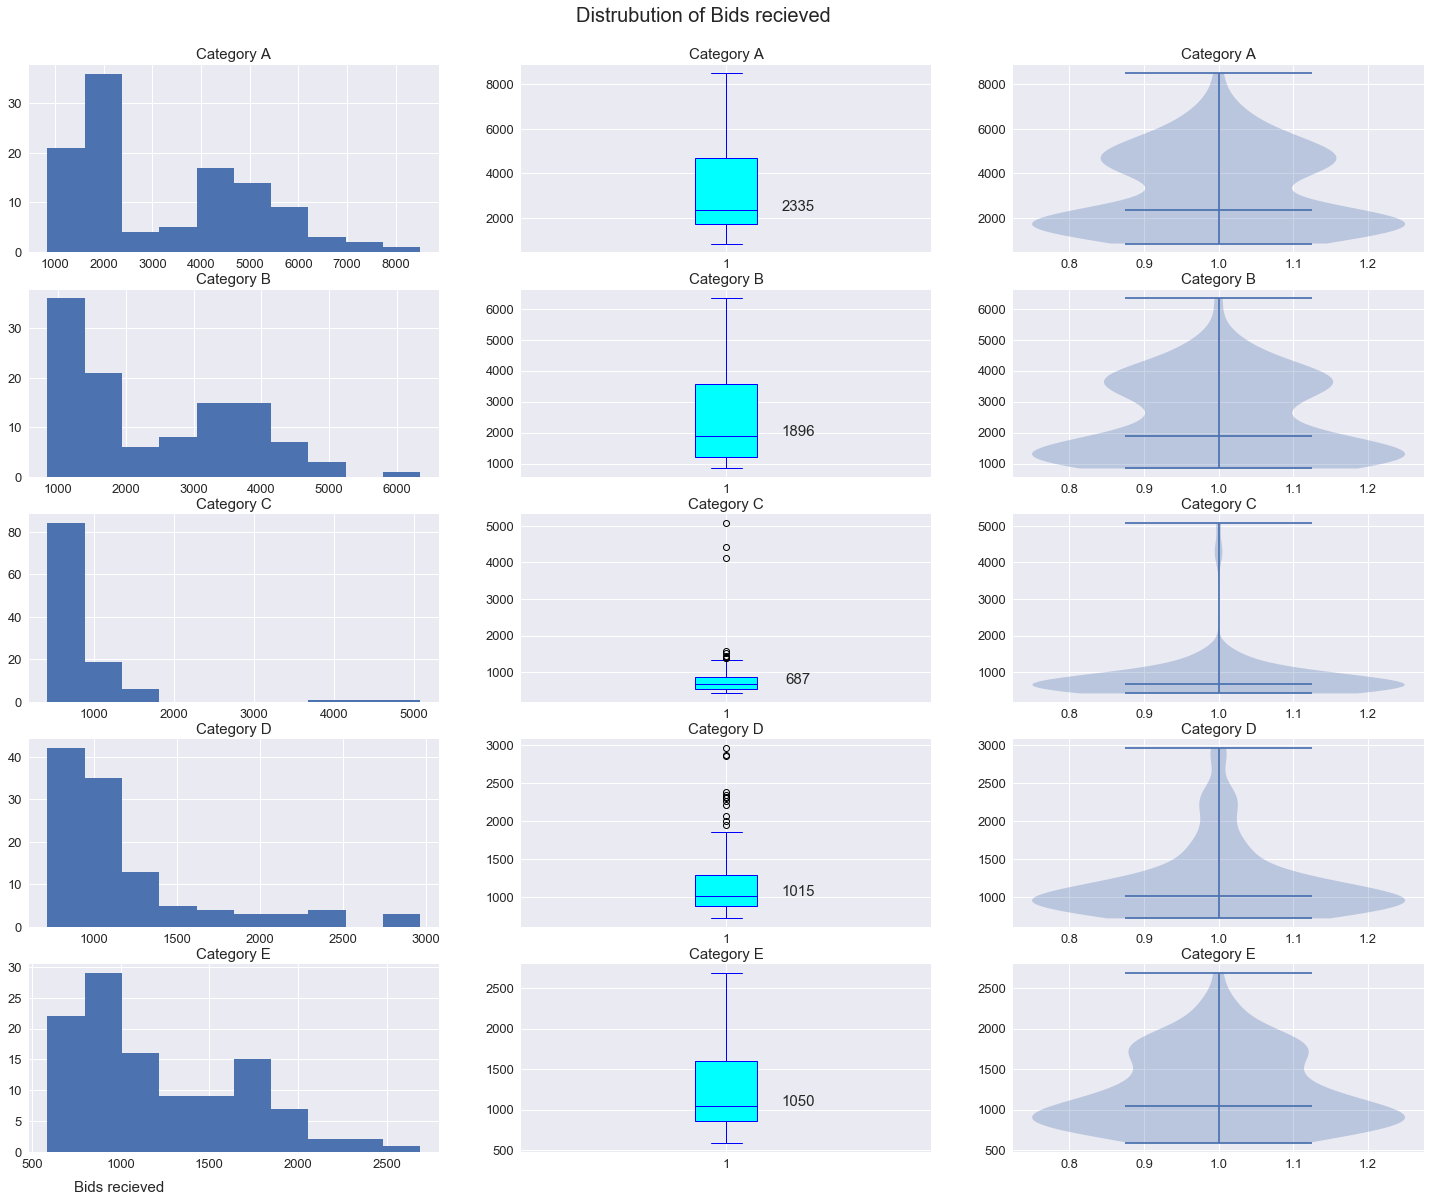

In [30]:
coe_bids_recieved = np.array(coe_bids_recieved)
bids_recieved_vehicle = [coe_bids_recieved[:, i] for i in range(len(coe_vehicle_classes))]

fig, ax = utils.getDistoPlot(bids_recieved_vehicle, coe_vehicle_classes)
fig.suptitle('Distrubution of Bids recieved', y=0.92, fontsize=20)
fig.text(0.15, 0.1, 'Bids recieved', fontsize=15, verticalalignment='center')

plt.savefig('plots/coe_3.png')

# fig, ax = plt.subplots(coe_quota.shape[1], 2, figsize=(20, 20))
# for i, (a, vehicle_class) in enumerate(zip(ax, coe_vehicle_classes)):
#     a[0].hist(coe_bids_recieved[:, i])
#     bp_dict = a[1].boxplot(coe_bids_recieved[:, i])
#     a[0].set_title(vehicle_class)
#     a[1].set_xticklabels([vehicle_class])
#     for line in bp_dict['medians']:
#         x, y = line.get_xydata()[1]
#         a[1].text(x+0.1, y, '%i' % y,
#              horizontalalignment='center', fontsize=15)
# fig.suptitle('Distrubution of Bids recieved', y=0.9)

Text(0.2, 0.1, 'Bids successful')

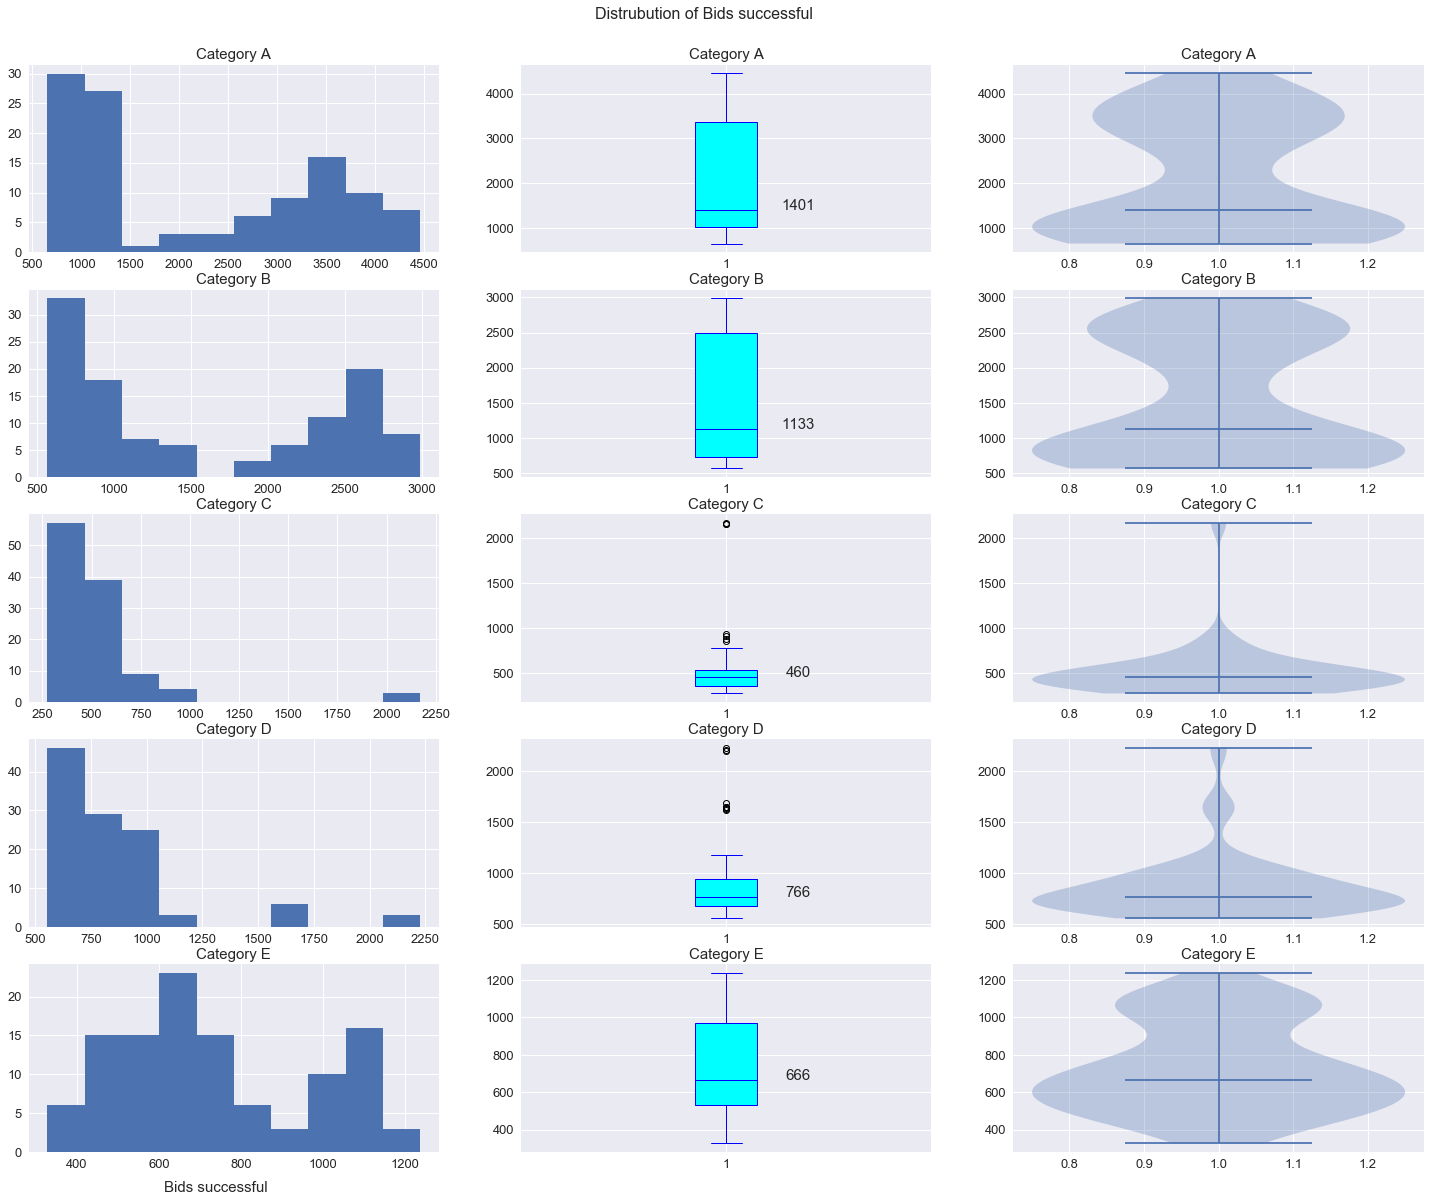

In [31]:
coe_bids_success = np.array(coe_bids_success)
bids_success_vehicle = [coe_bids_success[:, i] for i in range(len(coe_vehicle_classes))]

fig, ax = utils.getDistoPlot(bids_success_vehicle, coe_vehicle_classes)
fig.suptitle('Distrubution of Bids successful', y=0.92, fontsize=16)
fig.text(0.2, 0.1, 'Bids successful', fontsize=15, verticalalignment='center')

# fig, ax = plt.subplots(coe_bids_success.shape[1], 2, figsize=(20, 20))
# for i, (a, vehicle_class) in enumerate(zip(ax, coe_vehicle_classes)):
#     a[0].hist(coe_bids_success[:, i])
#     bp_dict = a[1].boxplot(coe_bids_success[:, i])
#     a[0].set_title(vehicle_class)
#     a[1].set_xticklabels([vehicle_class])
#     for line in bp_dict['medians']:
#         x, y = line.get_xydata()[1]
#         a[1].text(x+0.1, y, '%i' % y,
#              horizontalalignment='center', fontsize=15)
# fig.suptitle('Distrubution of Bids successful', y=0.9)

Text(0.18, 0.1, 'Bids success proportion')

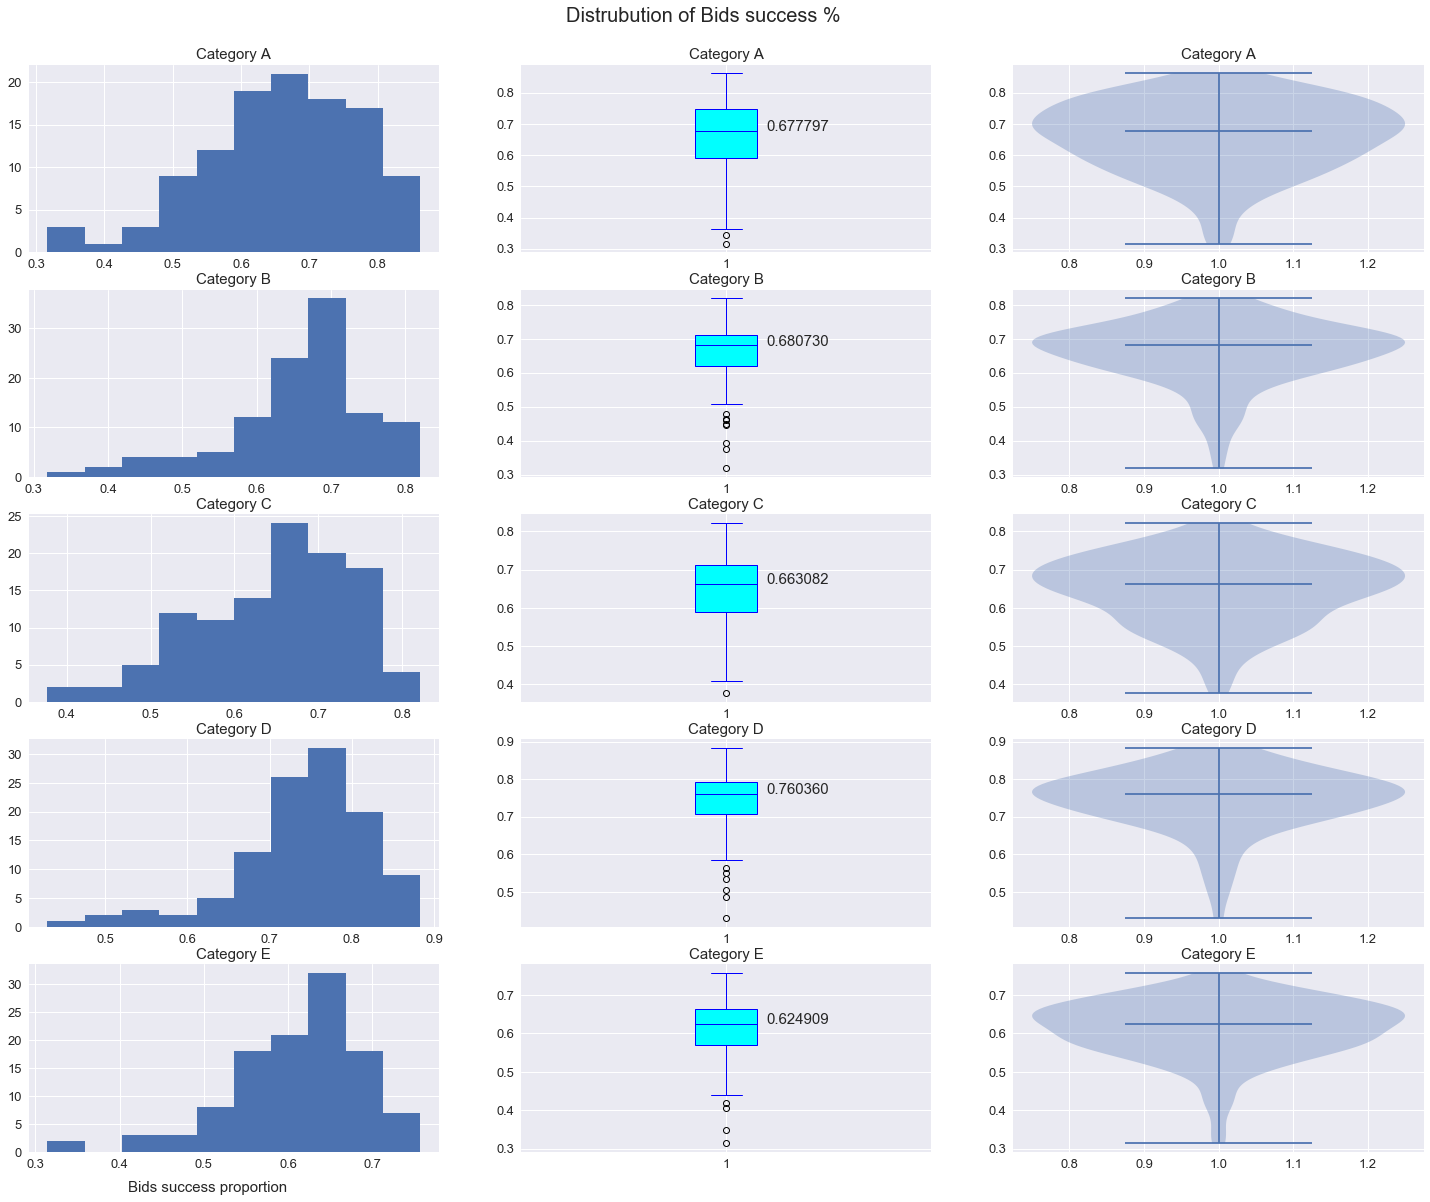

In [32]:
coe_success_per = coe_bids_success / coe_bids_recieved
success_per_vehicle = [coe_success_per[:, i] for i in range(len(coe_vehicle_classes))]

fig, ax = utils.getDistoPlot(success_per_vehicle, coe_vehicle_classes, format='%2f')
fig.suptitle('Distrubution of Bids success %', y=0.92, fontsize=20)
fig.text(0.18, 0.1, 'Bids success proportion', fontsize=15, verticalalignment='center')

# fig, ax = plt.subplots(coe_bids_success.shape[1], 2, figsize=(20, 20))
# for i, (a, vehicle_class) in enumerate(zip(ax, coe_vehicle_classes)):
#     a[0].hist(coe_success_per[:, i])
#     bp_dict = a[1].boxplot(coe_success_per[:, i])
#     a[0].set_title(vehicle_class)
#     a[1].set_xticklabels([vehicle_class])
#     for line in bp_dict['medians']:
#         x, y = line.get_xydata()[1]
#         a[1].text(x+0.1, y, '%.2f' % y,
#              horizontalalignment='center', fontsize=15)
# fig.suptitle('Distrubution of Bids success percentage', y=0.9)

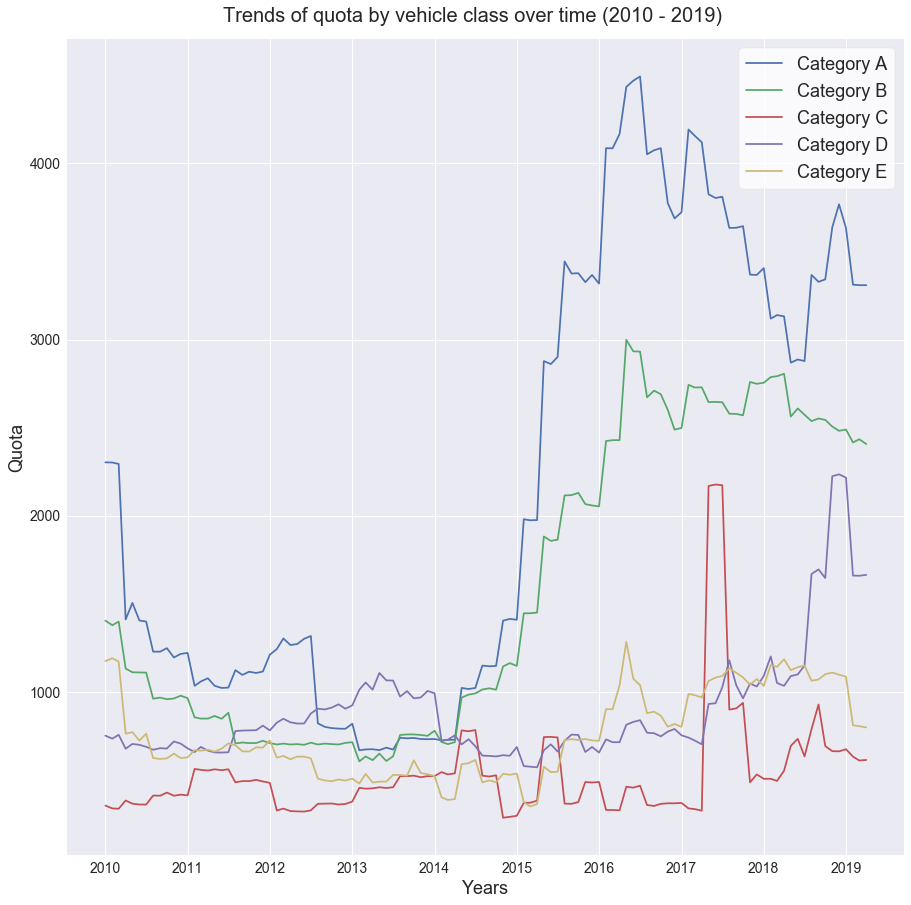

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, vehicle_class in zip(range(len(coe_vehicle_classes)), coe_vehicle_classes):
    ax.plot(coe_months, coe_quota[:, i], label=vehicle_class)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Quota', fontsize=18)
ax.tick_params(labelsize=14)
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')
fig.suptitle('Trends of quota by vehicle class over time (2010 - 2019)', fontsize=20, y=0.91)

plt.savefig('plots/coe_4.png')
# utils.resetxlabels(ax)

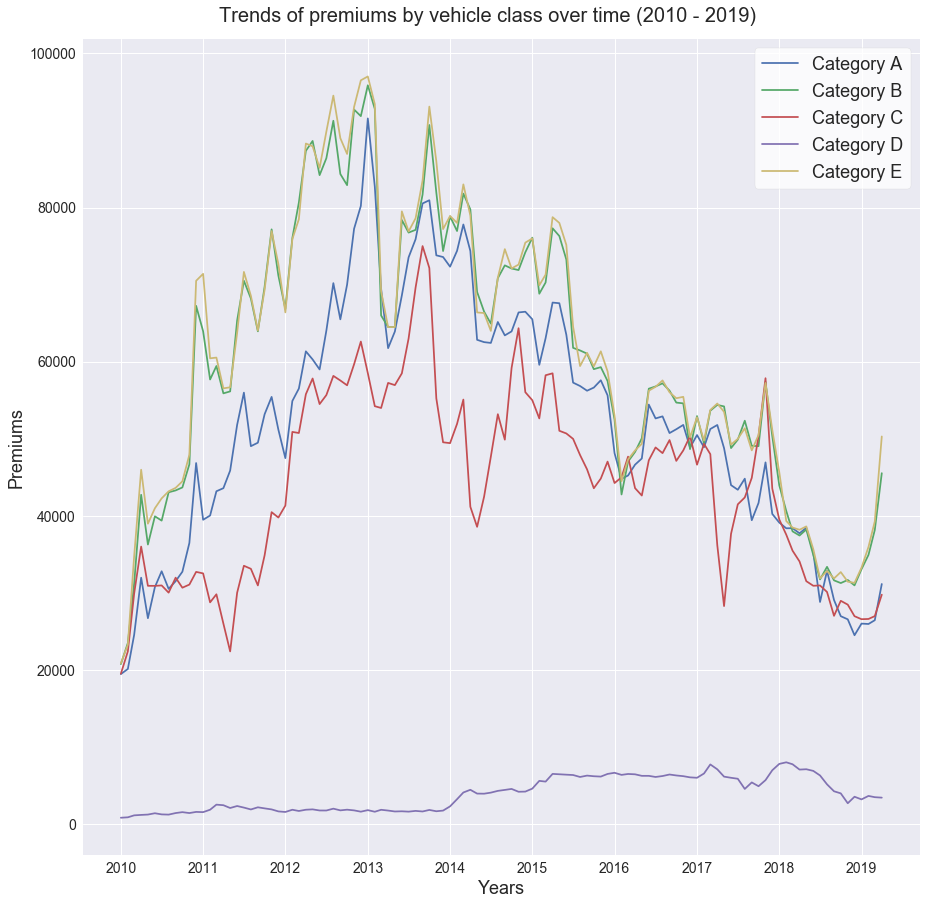

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, vehicle_class in zip(range(len(coe_vehicle_classes)), coe_vehicle_classes):
    ax.plot(coe_months, coe_premiums[:, i], label=vehicle_class)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Premiums', fontsize=18)
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')
ax.tick_params(labelsize=14)
fig.suptitle('Trends of premiums by vehicle class over time (2010 - 2019)', fontsize=20, y=0.91)

plt.savefig('plots/coe_5.png')

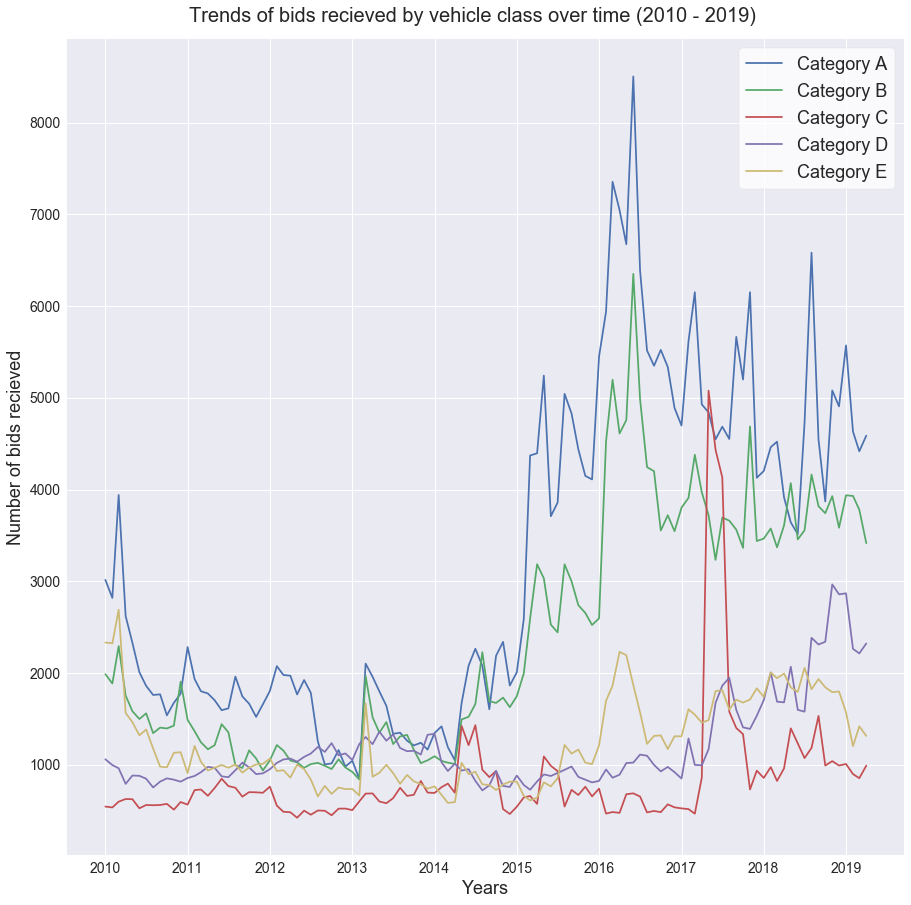

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, vehicle_class in zip(range(len(coe_vehicle_classes)), coe_vehicle_classes):
    ax.plot(coe_months, coe_bids_recieved[:, i], label=vehicle_class)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Number of bids recieved', fontsize=18)
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')
ax.tick_params(labelsize=14)
fig.suptitle('Trends of bids recieved by vehicle class over time (2010 - 2019)', fontsize=20, y=0.91)

plt.savefig('plots/coe_6.png')

Text(0.5, 0.91, 'Trends of bids successful by vehicle class over time (2010 - 2019)')

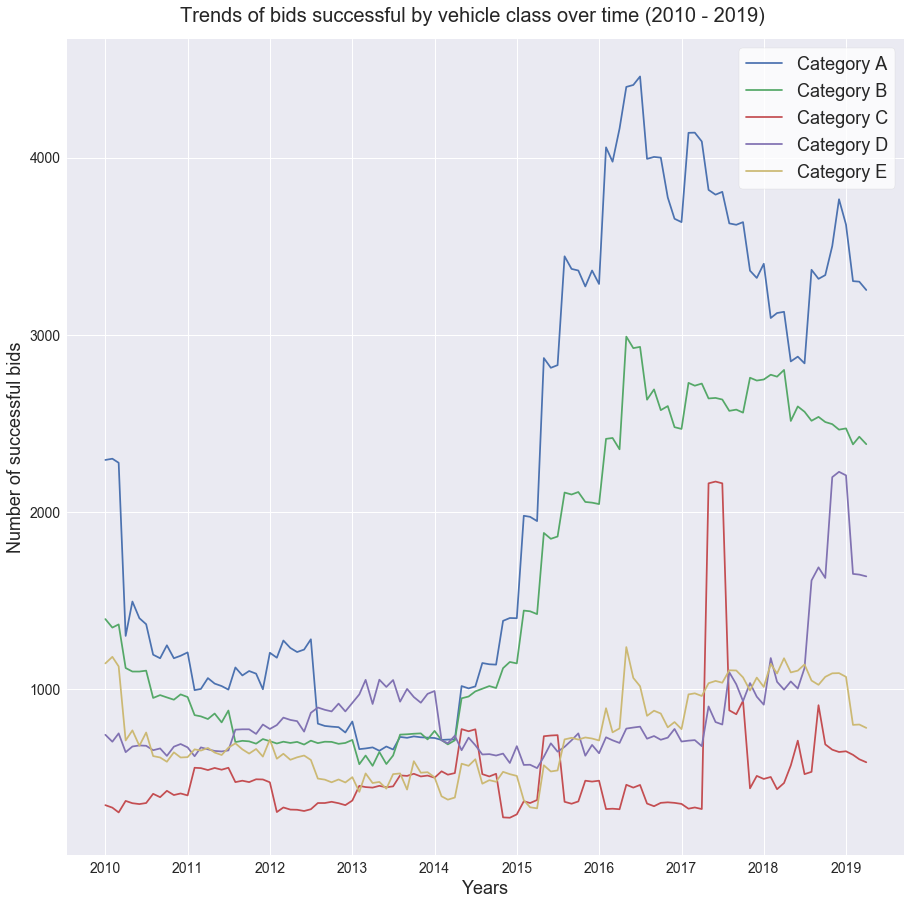

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, vehicle_class in zip(range(len(coe_vehicle_classes)), coe_vehicle_classes):
    ax.plot(coe_months, coe_bids_success[:, i], label=vehicle_class)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Number of successful bids', fontsize=18)
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')
ax.tick_params(labelsize=14)
fig.suptitle('Trends of bids successful by vehicle class over time (2010 - 2019)', fontsize=20, y=0.91)

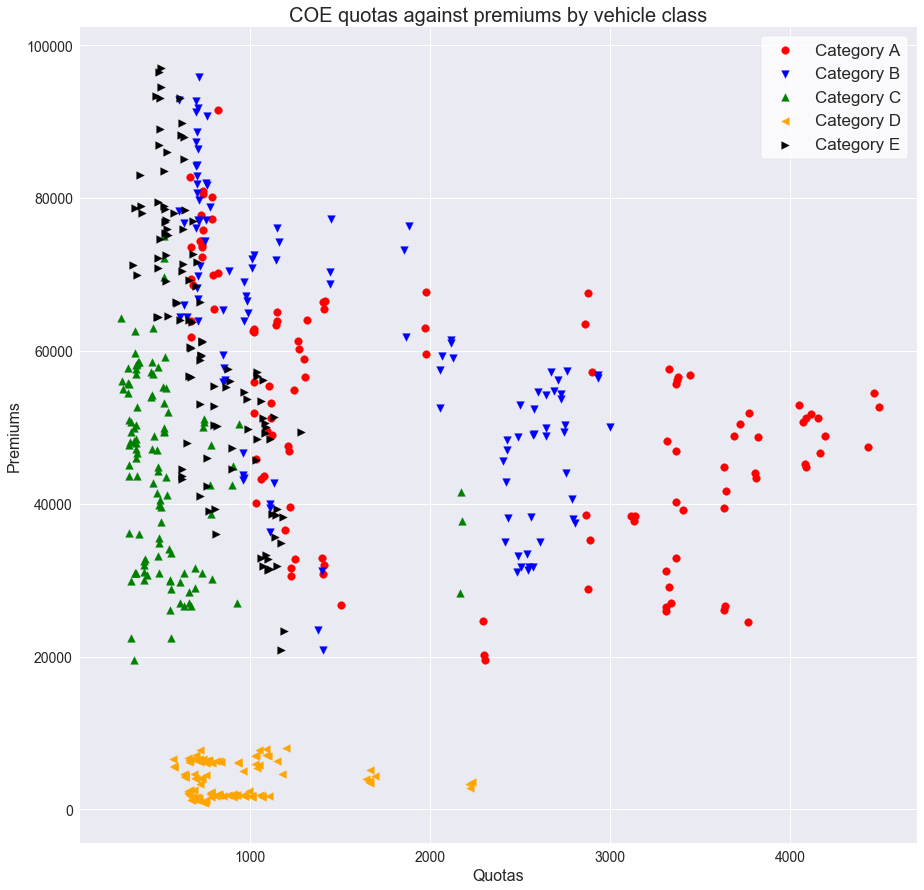

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, label, c in zip(range(coe_quota.shape[1]), coe_vehicle_classes, ['r', 'b', 'green', 'orange', 'black']):
    ax.scatter(coe_quota[:, i], coe_premiums[:, i], label=label, c=c, marker=next(marker), s=60)
    
ax.set_title('COE quotas against premiums by vehicle class', fontsize=20)
ax.set_xlabel('Quotas', fontsize=16)
ax.set_ylabel('Premiums', fontsize=16)
ax.tick_params(labelsize=14)
ax.legend(prop={'size': 17},frameon=True).get_frame().set_facecolor('white')

plt.savefig('plots/coe_7.png')

# for i, color, vehicle_class in zip(range(coe_quota.shape[1]), ['r', 'b', 'green', 'orange', 'black'], coe_vehicle_classes):
#      ax.scatter(coe_quota[:, i], coe_premiums[:, i], c=color, label=vehicle_class)

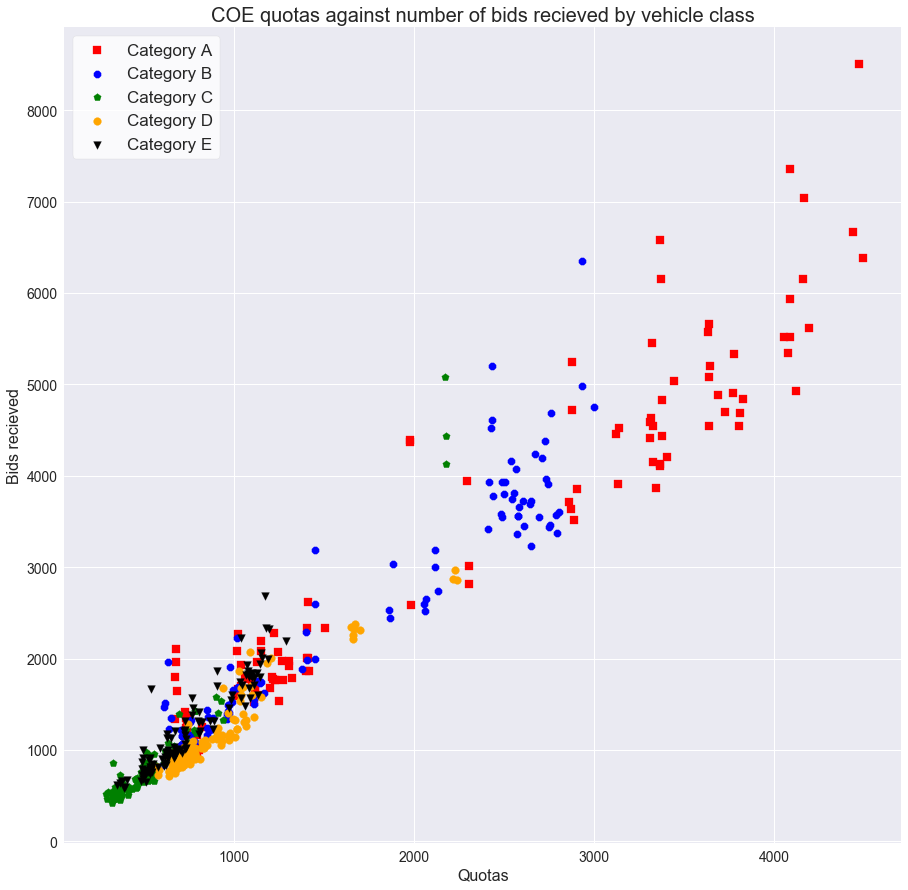

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, label, c in zip(range(coe_quota.shape[1]), coe_vehicle_classes, ['r', 'b', 'green', 'orange', 'black']):
    ax.scatter(coe_quota[:, i], coe_bids_recieved[:, i], label=label, c=c, marker=next(marker), s=60)
    
ax.set_title('COE quotas against number of bids recieved by vehicle class', fontsize=20)
ax.set_xlabel('Quotas', fontsize=16)
ax.set_ylabel('Bids recieved', fontsize=16)
ax.tick_params(labelsize=14)
ax.legend(prop={'size': 17}, frameon=True).get_frame().set_facecolor('white')

plt.savefig('plots/coe_9.png')

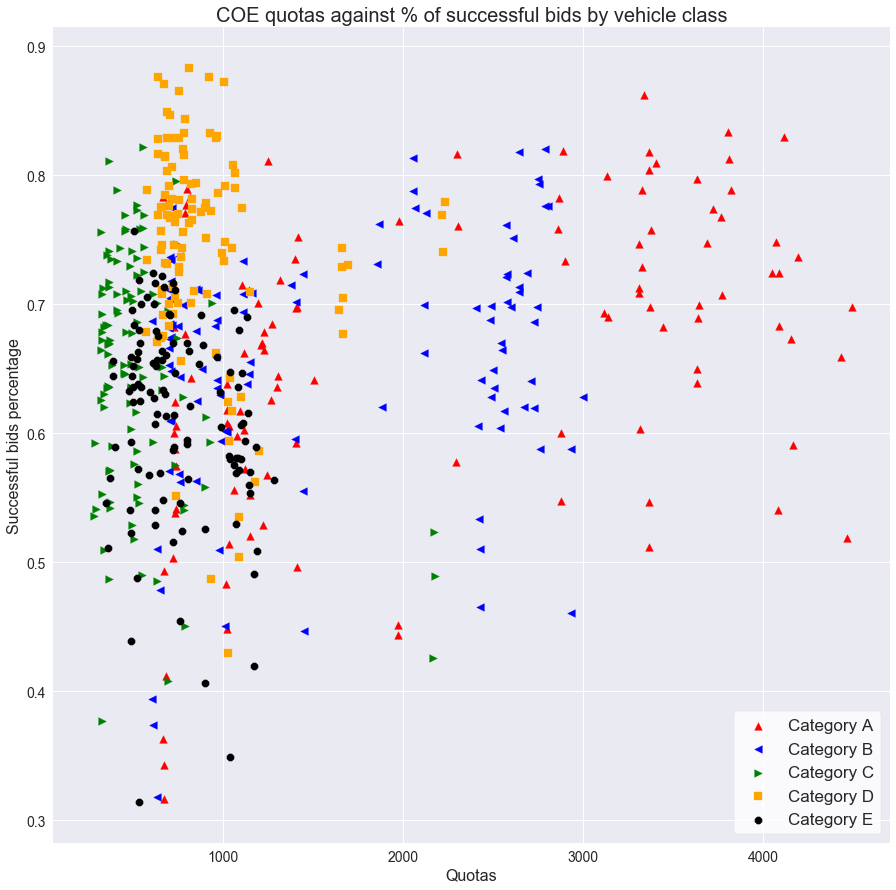

In [39]:
'''
Not much relation
'''
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for i, label, c in zip(range(coe_quota.shape[1]), coe_vehicle_classes, ['r', 'b', 'green', 'orange', 'black']):
    ax.scatter(coe_quota[:, i], coe_success_per[:, i], label=label, c=c, marker=next(marker), s=60)
    
    
ax.set_title('COE quotas against % of successful bids by vehicle class', fontsize=20)
ax.set_xlabel('Quotas', fontsize=16)
ax.set_ylabel('Successful bids percentage', fontsize=16)
ax.tick_params(labelsize=14)
ax.legend(prop={'size': 17}, frameon=True).get_frame().set_facecolor('white')


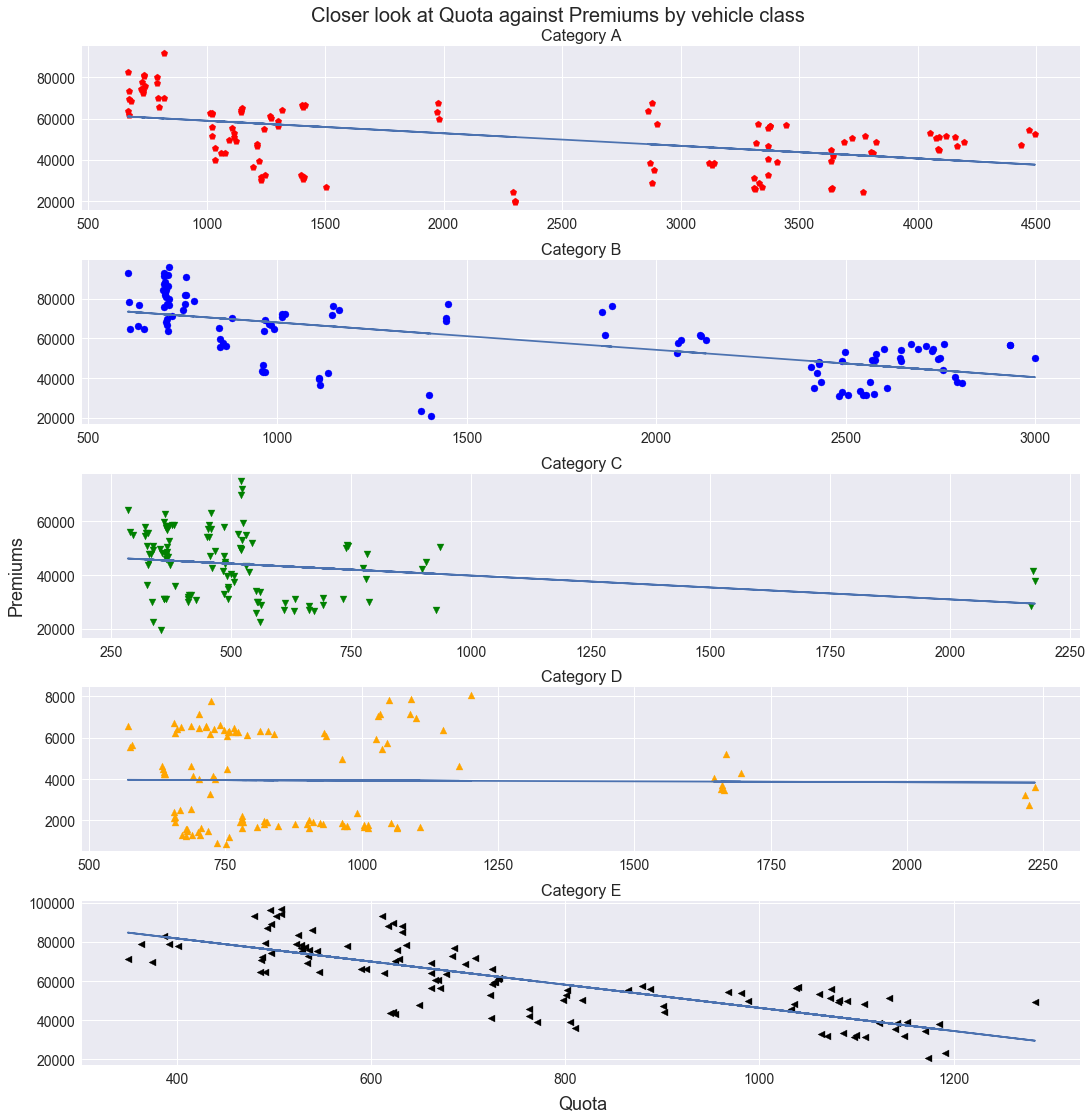

In [40]:
fig, ax = plt.subplots(len(coe_vehicle_classes), 1, figsize=(15, 15))
for i, color, vehicle_class in zip(range(coe_quota.shape[1]), ['r', 'b', 'green', 'orange', 'black'], coe_vehicle_classes):
    ax[i].scatter(coe_quota[:, i], coe_premiums[:, i], c=color, label=vehicle_class, marker=next(marker))
    trend = np.polyfit(coe_quota[:, i], coe_premiums[:, i], 1)
    trend_line = np.poly1d(trend)
    ax[i].plot(coe_quota[:, i], trend_line(coe_quota[:, i]))
    ax[i].set_title(vehicle_class, fontsize=16)
    ax[i].tick_params(labelsize=14)
#     ax[i].tick_params(labelsize=14)
fig.suptitle('Closer look at Quota against Premiums by vehicle class', y=1.01, fontsize=20)
fig.text(-0.01, 0.45, 'Premiums', fontdict = {'fontsize': 18}, rotation='vertical')
fig.text(0.5, -0.01, 'Quota', fontdict = {'fontsize': 18})
plt.tight_layout()

plt.savefig('plots/coe_8.png')

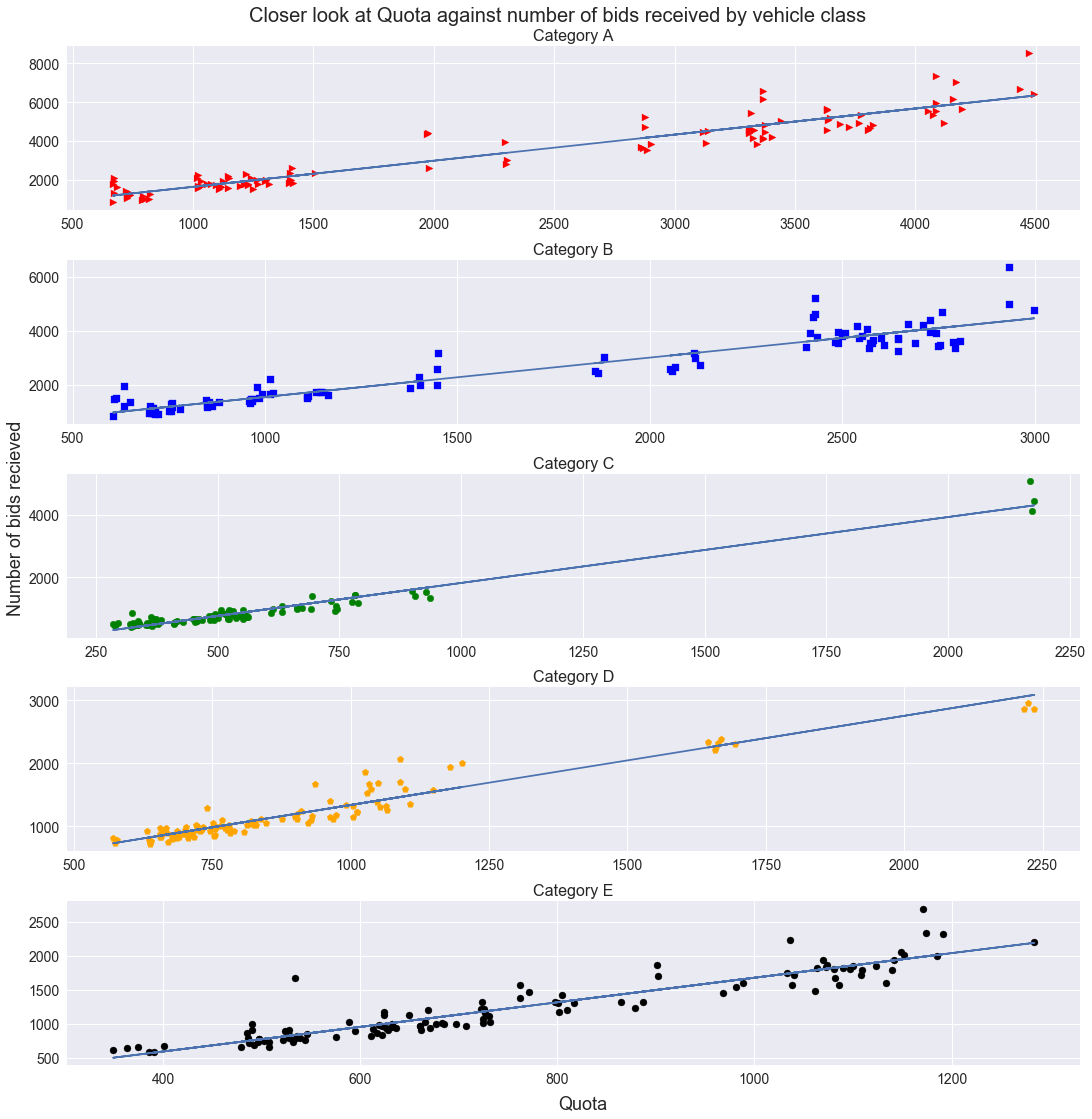

In [41]:
fig, ax = plt.subplots(len(coe_vehicle_classes), 1, figsize=(15, 15))
for i, color, vehicle_class in zip(range(coe_quota.shape[1]), ['r', 'b', 'green', 'orange', 'black'], coe_vehicle_classes):
    ax[i].scatter(coe_quota[:, i], coe_bids_recieved[:, i], c=color, label=vehicle_class, marker=next(marker))
    trend = np.polyfit(coe_quota[:, i], coe_bids_recieved[:, i], 1)
    trend_line = np.poly1d(trend)
    ax[i].plot(coe_quota[:, i], trend_line(coe_quota[:, i]))
    ax[i].set_title(vehicle_class)
    ax[i].set_title(vehicle_class, fontsize=16)
    ax[i].tick_params(labelsize=14)
#     ax[i].tick_params(labelsize=14)
fig.suptitle('Closer look at Quota against number of bids received by vehicle class', y=1.01, fontsize=20)
fig.text(-0.01, 0.45, 'Number of bids recieved', fontdict = {'fontsize': 18}, rotation='vertical')
fig.text(0.5, -0.01, 'Quota', fontdict = {'fontsize': 18})
plt.tight_layout()

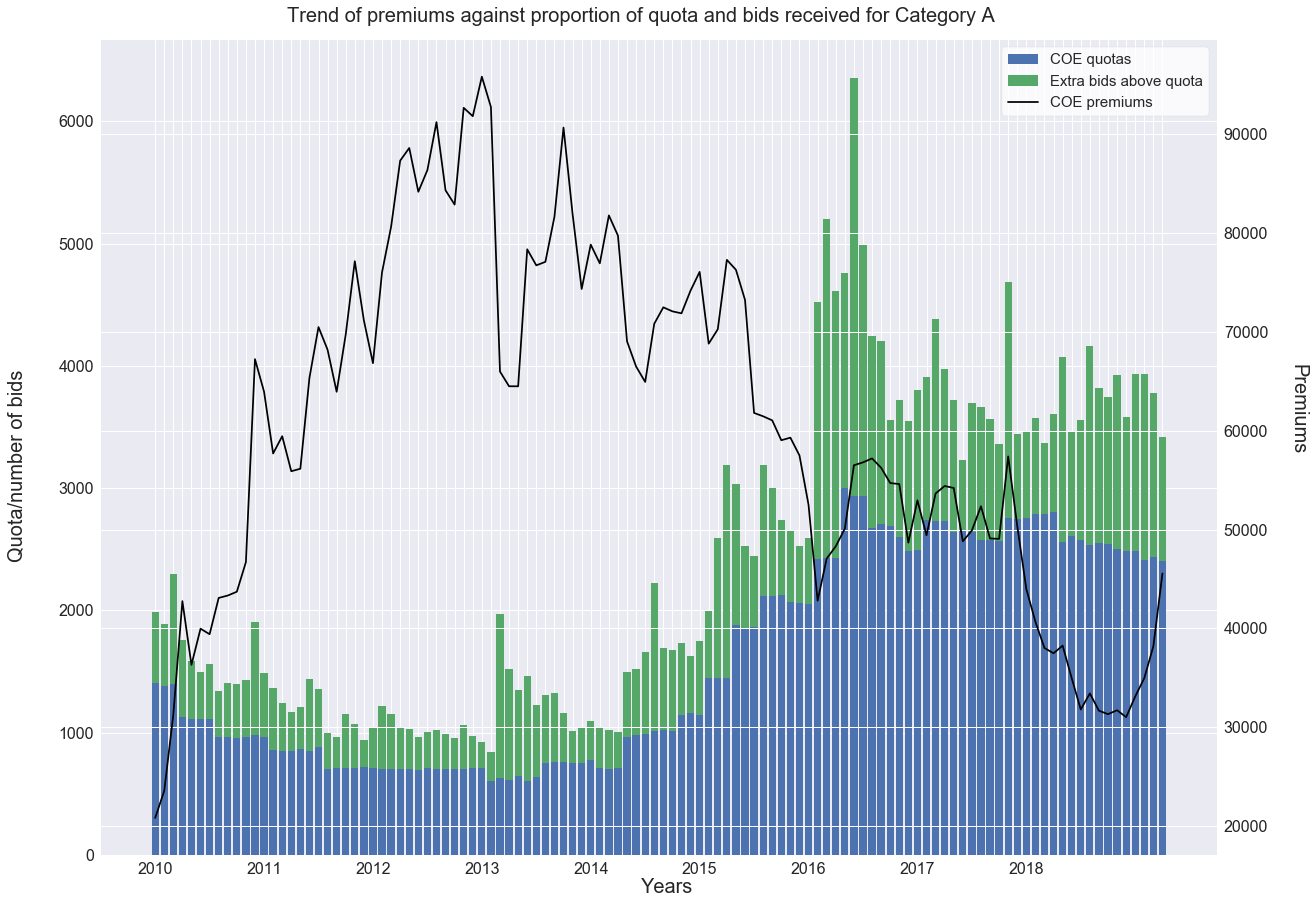

In [42]:
# Getting labels done
bar_stack_labels = ['COE quotas', 'Extra bids above quota']
line_label = 'COE premiums'

# Preping data
coe_q_a = coe_quota[:, 1]
coe_bids_rec_a = coe_bids_recieved[:, 1]
coe_p_a = coe_premiums[:, 1]
coe_diff_a = coe_bids_rec_a - coe_q_a

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
# Bar
ax.bar(coe_months_raw, coe_q_a, label=bar_stack_labels[0])
ax.bar(coe_months_raw, coe_diff_a, bottom=coe_q_a, label=bar_stack_labels[1])
# Line
ax1 = ax.twinx()
ax1.plot(coe_months_raw, coe_p_a, c='black', label=line_label)

# Dealing with ticks
ax.set_xticklabels(generateXticksCOE())
ax.tick_params(labelsize=16)
ax1.tick_params(labelsize=16)

# Adding legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc=0, prop={'size': 15}, frameon=True).get_frame().set_facecolor('white')

# Fig titles
fig.suptitle('Trend of premiums against proportion of quota and bids received for Category A', y=0.91, fontsize=20)
fig.text(0.06, 0.4, 'Quota/number of bids', fontdict = {'fontsize': 20}, rotation='vertical') # Left side
fig.text(0.95, 0.5, 'Premiums', fontdict = {'fontsize': 20}, rotation=270) # Right side
fig.text(0.5, 0.09, 'Years', fontdict = {'fontsize': 20})
print()

plt.savefig('plots/coe_10.png')

CPU times: user 1.1 s, sys: 12 ms, total: 1.11 s
Wall time: 1.11 s


Text(0.5, 0.11, 'Years')

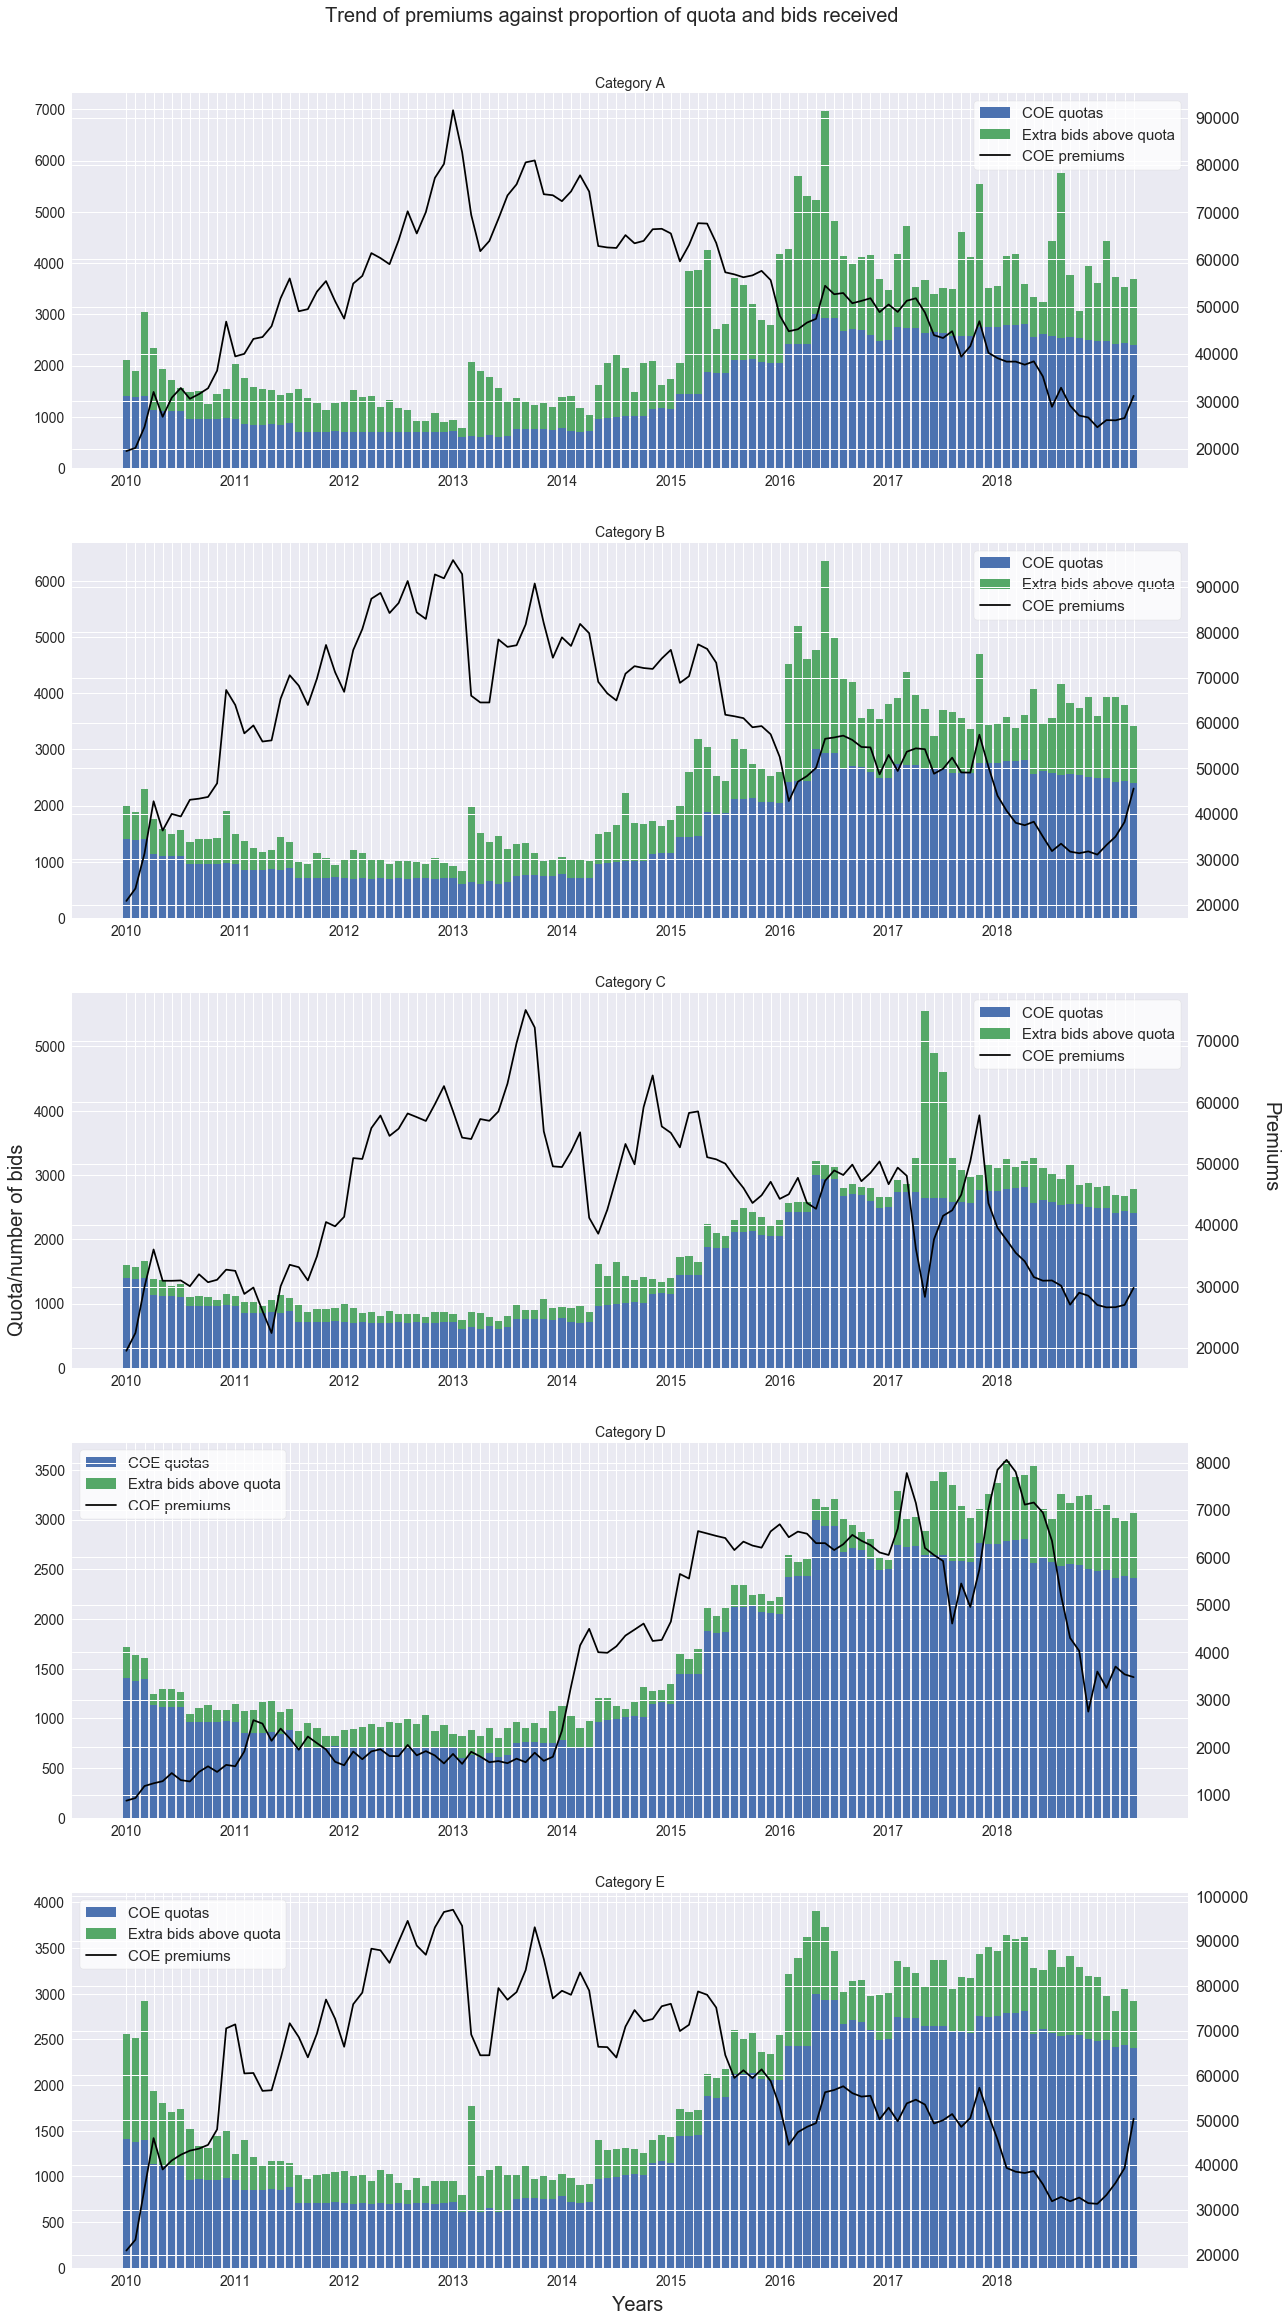

In [43]:
%%time
fig, ax = plt.subplots(len(coe_vehicle_classes), 1, figsize=(20, 40))
for i, (vehicle_class) in enumerate(coe_vehicle_classes):
    coe_q_cat = coe_quota[:, i]
    coe_bids_rec_cat = coe_bids_recieved[:, i]
    coe_diff_bids = coe_bids_rec_cat - coe_q_cat
    coe_p_cat = coe_premiums[:, i]
    ax[i].set_title(vehicle_class, fontsize=14)
    bar_1 = ax[i].bar(coe_months_raw, coe_q_a, label=bar_stack_labels[0])
    bar_2 = ax[i].bar(coe_months_raw, coe_diff_bids, bottom=coe_q_a, label=bar_stack_labels[1])
    ax[i].tick_params(labelsize=14)
    ax1 = ax[i].twinx()
    l_1 = ax1.plot(coe_months_raw, coe_p_cat, c='black', label=line_label)
    ax1.set_xticklabels(generateXticksCOE())
    ax1.tick_params(labelsize=16)
    lines, labels = ax[i].get_legend_handles_labels()
    lines2, labels2 = ax1.get_legend_handles_labels()
    ax[i].legend(lines + lines2, labels + labels2, loc=0, prop={'size': 15}, frameon=True).get_frame().set_facecolor('white')

# Adding fig attributes
fig.suptitle('Trend of premiums against proportion of quota and bids received', y=0.91, fontsize=20)
fig.text(0.08, 0.45, 'Quota/number of bids', fontdict = {'fontsize': 20}, rotation='vertical') # Left side
fig.text(0.95, 0.5, 'Premiums', fontdict = {'fontsize': 20}, rotation=270) # Right side
fig.text(0.5, 0.11, 'Years', fontdict = {'fontsize': 20})

# Extra
Everything below here was extra and I am mainly not using them.

In [44]:
# Code to agg by year
coe_premium_year = []
for i in range(9):
    coe_premium_year.append([coe_premiums[(i)*12:(i+1)*12, j].sum() for j in range(coe_premiums.shape[1])])
coe_premium_year.append([coe_premiums[9*12:, j].sum() for j in range(coe_premiums.shape[1])])
coe_premium_year = np.array(coe_premium_year)
# Code to agg by year
coe_quota_year = []
for i in range(9):
    coe_quota_year.append([coe_quota[(i)*12:(i+1)*12, j].mean() for j in range(coe_quota.shape[1])])
coe_quota_year.append([coe_quota[9*12:, j].mean() for j in range(coe_quota.shape[1])])
coe_quota_year = np.array(coe_quota_year)

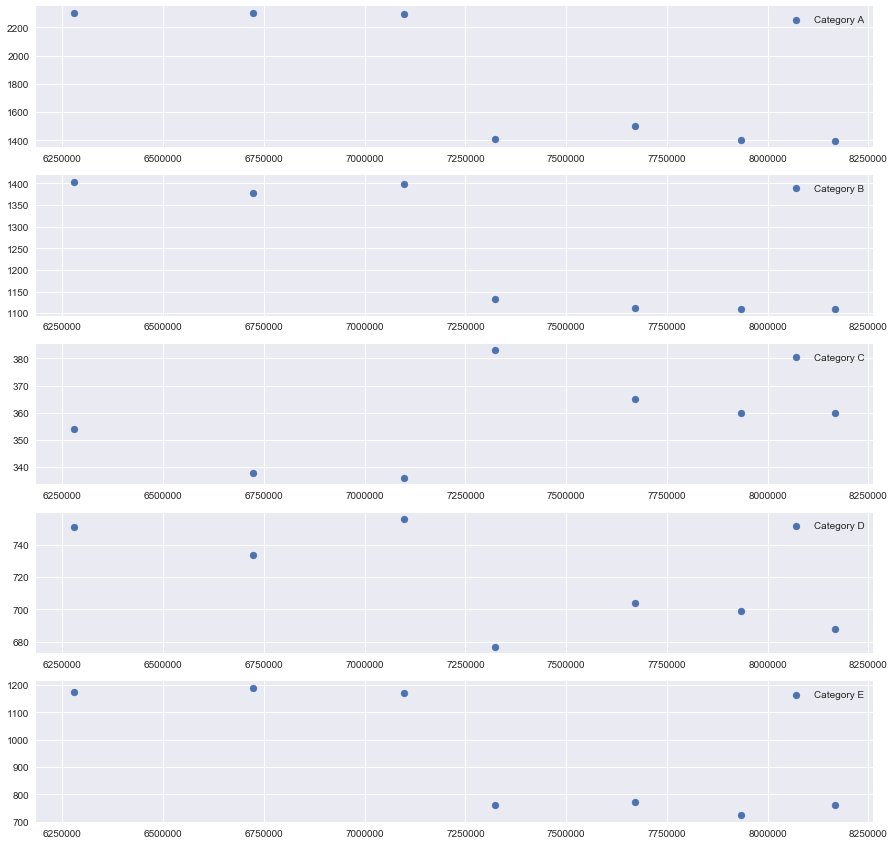

In [45]:
# years[15:]
# coe_quota[:7].shape
fig, ax = plt.subplots(5, 1, figsize=(15, 15))
merge_year = [year['trips'].sum() for year in utils.grpBy(pub_trips, 'year')][15:]
for i, vehicle in enumerate(coe_vehicle_classes):
    ax[i].scatter(merge_year, coe_quota[:7, i], label=vehicle)
    ax[i].legend()

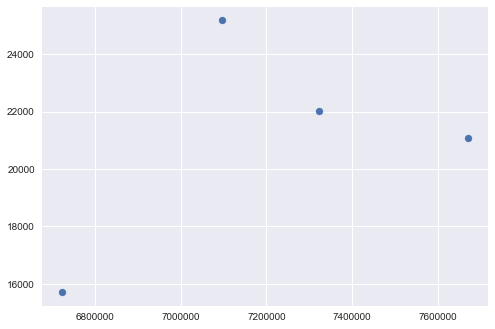

In [46]:
# Pub data against premiums of coe
mode_dist_year = [year['trips'].sum() for year in utils.grpBy(pub_mode_merge[1], 'year')]
len(mode_dist_year)
# len(mode_dist_year[-4:])
plt.scatter(mode_dist_year[-4:], coe_premium_year[:4, 3])

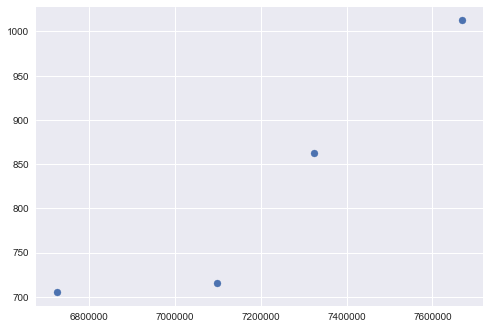

In [47]:
# Pub data is 
# Pub data against premiums of coe
# mode_dist_year = [year['ave_distance_per_trip'].sum() for year in utils.grpBy(pub_mode_merge[0], 'year')]
mode_dist_year = [year['trips'].sum() for year in utils.grpBy(pub_mode_merge[1], 'year')]
len(mode_dist_year)
# len(mode_dist_year[-4:])
plt.scatter(mode_dist_year[-4:], coe_quota_year[:4, 3])

In [48]:
# coe_results = np.genfromtxt('data/coe-results.csv', dtype=['U50', 'i8', 'U50', 'i8', 'i8', 'i8', 'i8'], delimiter=',', names=True)
all_motor_veh = np.genfromtxt('data/ann_veh_pop.csv', dtype=['U50', 'U50', 'U50', 'i8'], delimiter=',', names=True)
new_mortor_veh = np.genfromtxt('data/new-registration-of-motor-vehicles-under-vehicle-quota-system-vqs.csv', dtype=['U50', 'U50', 'i8'], delimiter=',', names=True)

# New registered Motor Vehicles

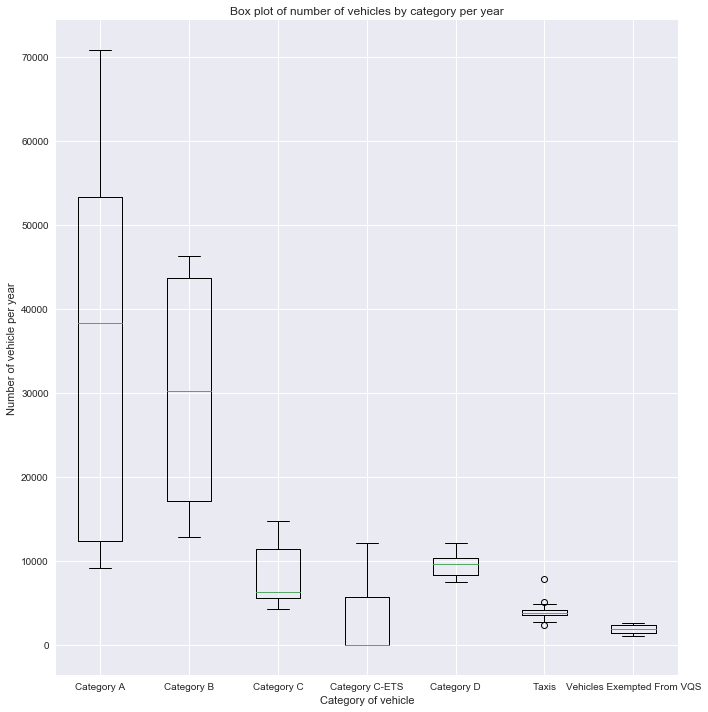

In [49]:
categories = np.unique(new_mortor_veh['category'])
motor_category = utils.grpBy(new_mortor_veh, 'category')
motor_category = [category['number'] for category in motor_category]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.boxplot(motor_category)
ax.set_xticklabels(categories.tolist())
ax.set_xlabel('Category of vehicle')
ax.set_ylabel('Number of vehicle per year')
ax.set_title('Box plot of number of vehicles by category per year')
fig.tight_layout()

Text(0.5, 1.01, 'Proportion of registered vehicles in each category by year')

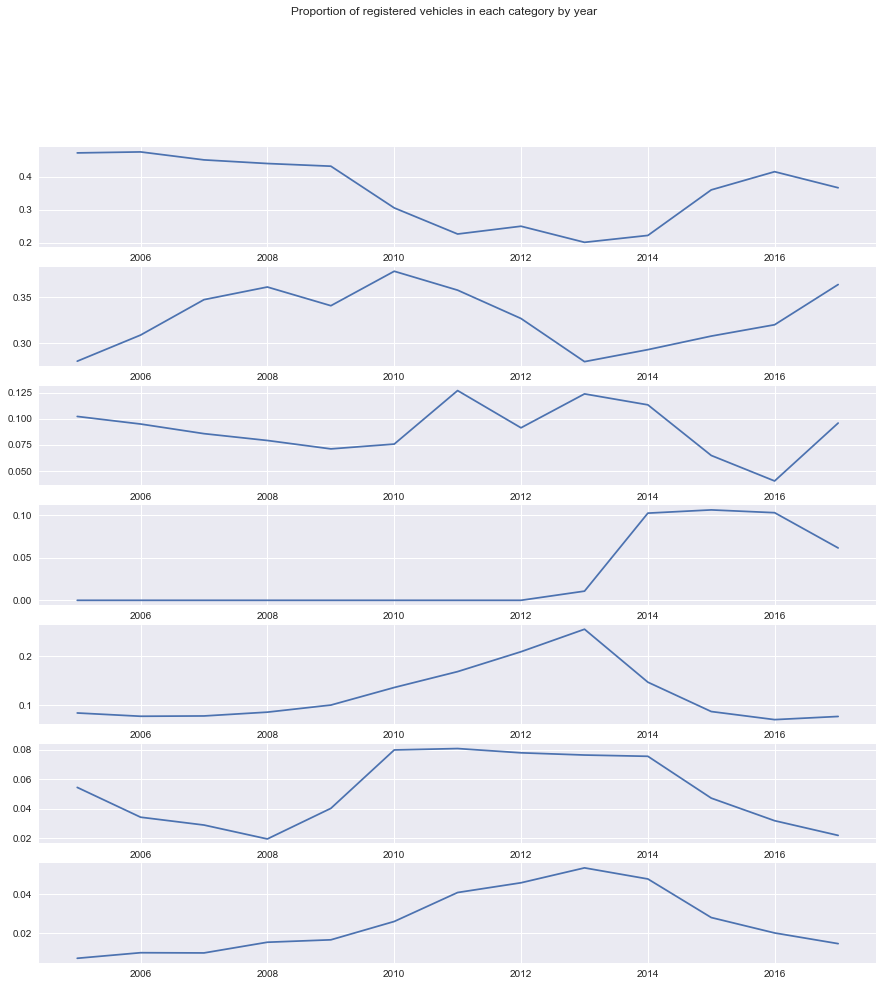

In [50]:
# Change in proportion of category over the years
# Without scale
motor_year = utils.grpBy(new_mortor_veh, 'year')
motor_year = np.array([year['number'] / year['number'].sum() for year in motor_year])
years = utils.convertColDate(new_mortor_veh, 'year')
years = np.unique(years)

motor_year = [motor_year[:, i] for i in range(motor_year.shape[1])]
motor_plot_year = [(years, year) for year in motor_year]

fig, ax = utils.subplots(motor_plot_year, categories)

fig.suptitle('Proportion of registered vehicles in each category by year', y=1.01)

# motor_year.shape
# years.shape

# motor_plot_year = [(years, year) for year in motor_year]
# utils.subplots(motor_plot_year)


Text(0.5, 1.01, 'Proportion of registered vehicles in each category by year')

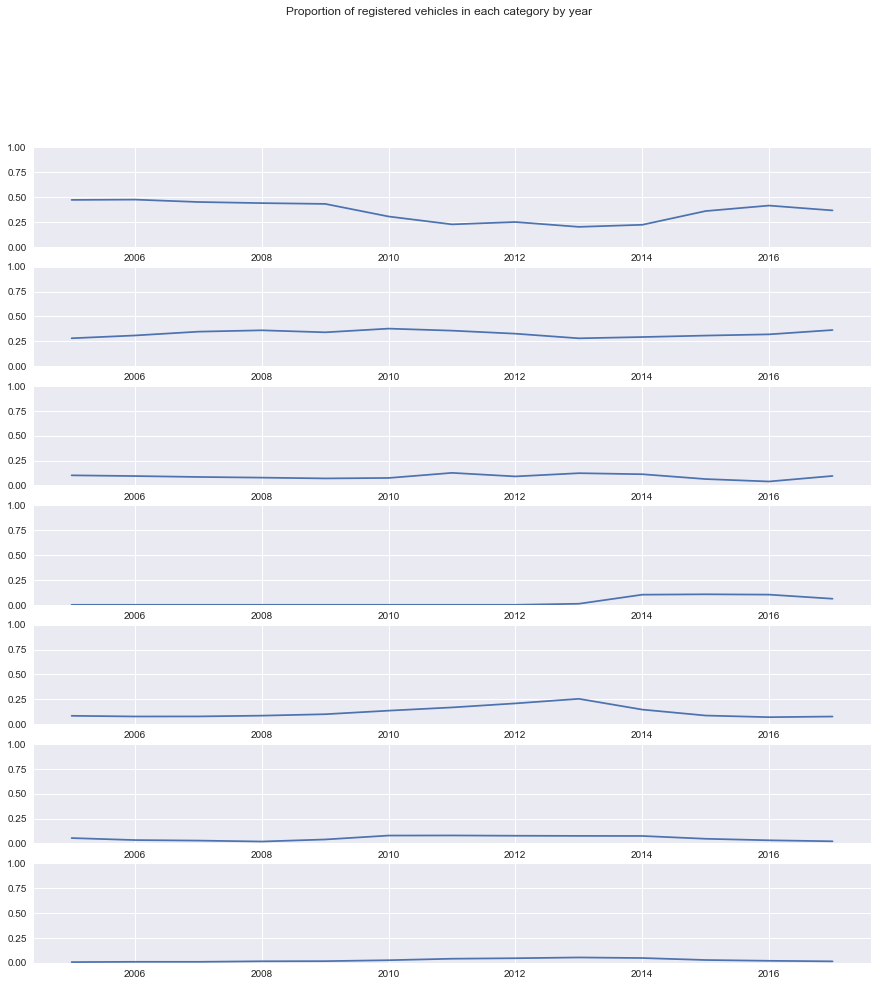

In [51]:
# Change in proportion of category over the years
# With scale
motor_year = utils.grpBy(new_mortor_veh, 'year')
motor_year = np.array([year['number'] / year['number'].sum() for year in motor_year])
years = utils.convertColDate(new_mortor_veh, 'year')
years = np.unique(years)

motor_year = [motor_year[:, i] for i in range(motor_year.shape[1])]
motor_plot_year = [(years, year) for year in motor_year]

fig, ax = utils.subplots(motor_plot_year, categories)
# Normalising yaxis
for a in ax:
    a.set_ylim(0, 1)
    
fig.suptitle('Proportion of registered vehicles in each category by year', y=1.01)

# motor_year.shape
# years.shape

# motor_plot_year = [(years, year) for year in motor_year]
# utils.subplots(motor_plot_year)


Text(0.5, 0, 'Year')

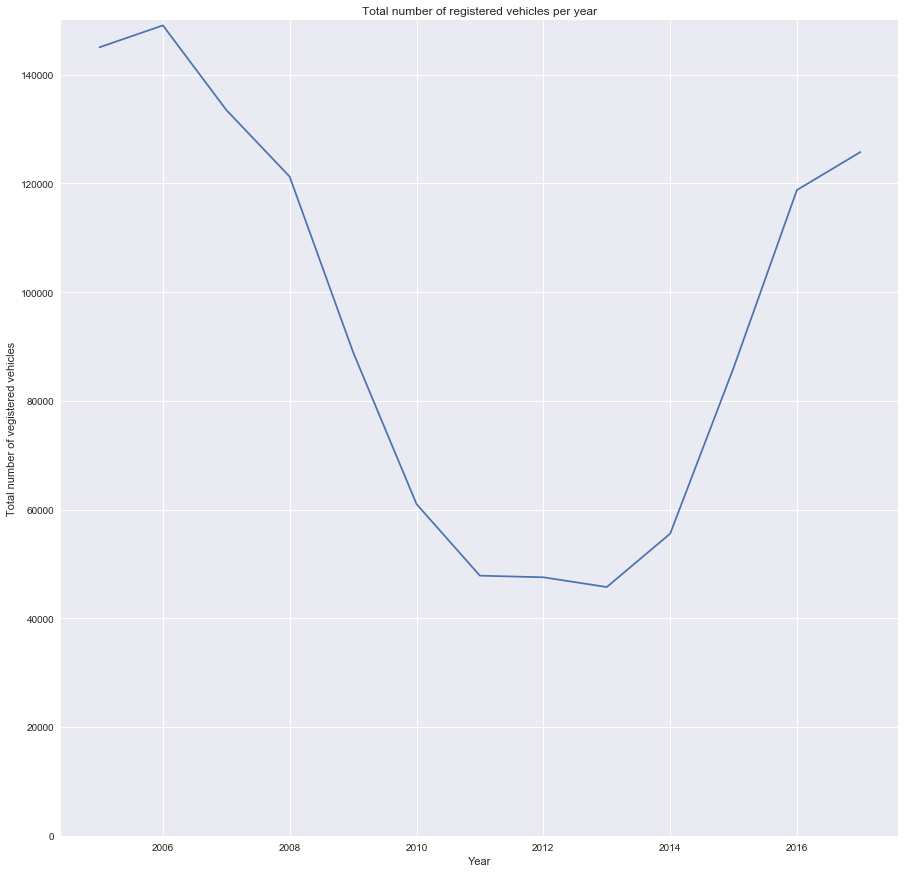

In [52]:
# Change in total number of register vehicles by year
motor_year = utils.grpBy(new_mortor_veh, 'year')
motor_year = [year['number'].sum() for year in motor_year]
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.plot(years, motor_year)
ax.set_ylim(0, 150000)
ax.set_title('Total number of registered vehicles per year')
ax.set_ylabel('Total number of vegistered vehicles')
ax.set_xlabel('Year')

# Vehicle population

(750000, 1000000)

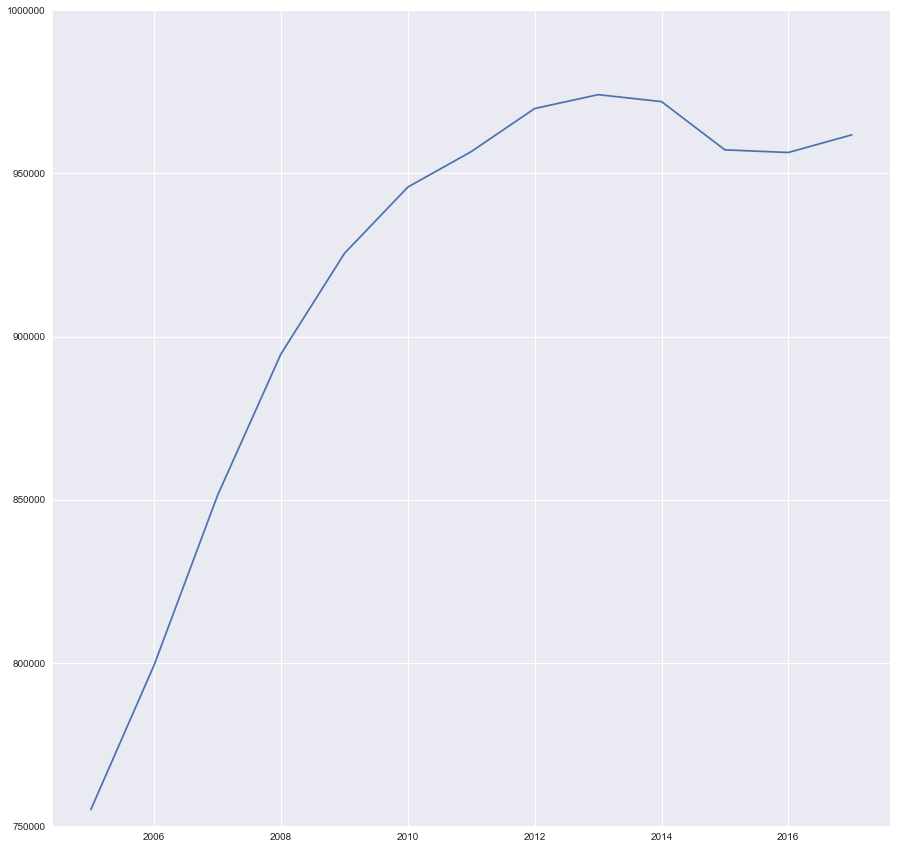

In [53]:
years = np.unique(utils.convertColDate(all_motor_veh, 'year'))
all_year = utils.grpBy(all_motor_veh, 'year')
all_year = [year['number'].sum() for year in all_year]
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.plot(years, all_year)
ax.set_ylim(750000, 1000000)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc213fef5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc213fefd68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc213fef1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc213ff94a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc213ff9828>],
 'means': []}

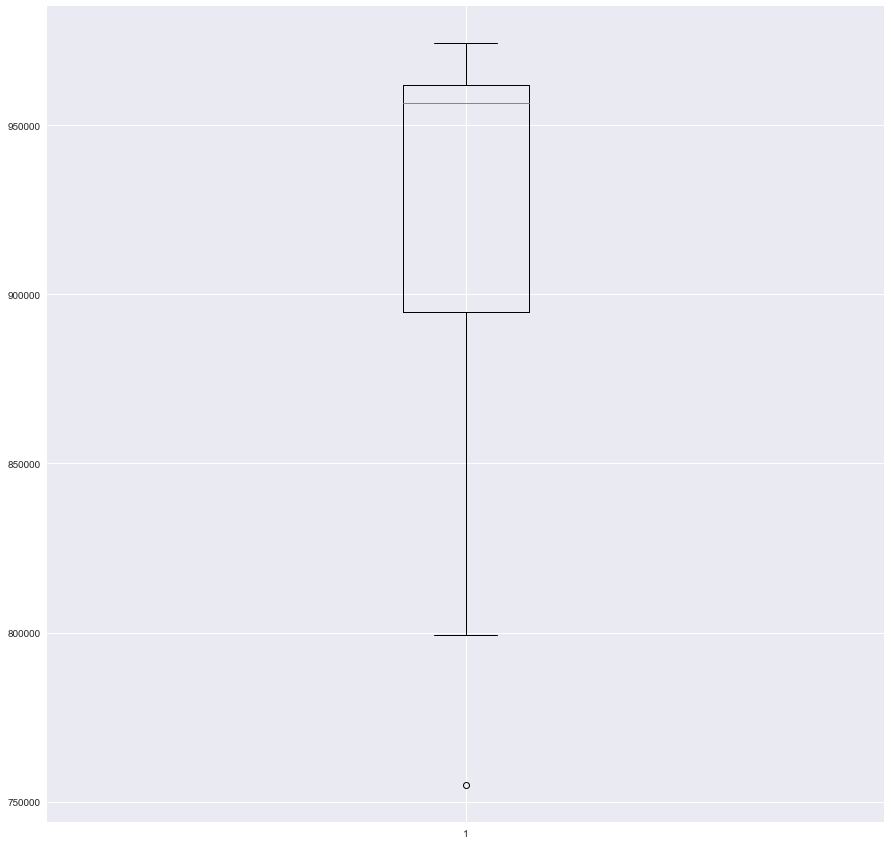

In [54]:
years = np.unique(utils.convertColDate(all_motor_veh, 'year'))
all_year = utils.grpBy(all_motor_veh, 'year')
all_year = [year['number'].sum() for year in all_year]
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.boxplot(all_year)

Text(-0.01, 0.5, 'Number of vehicles')

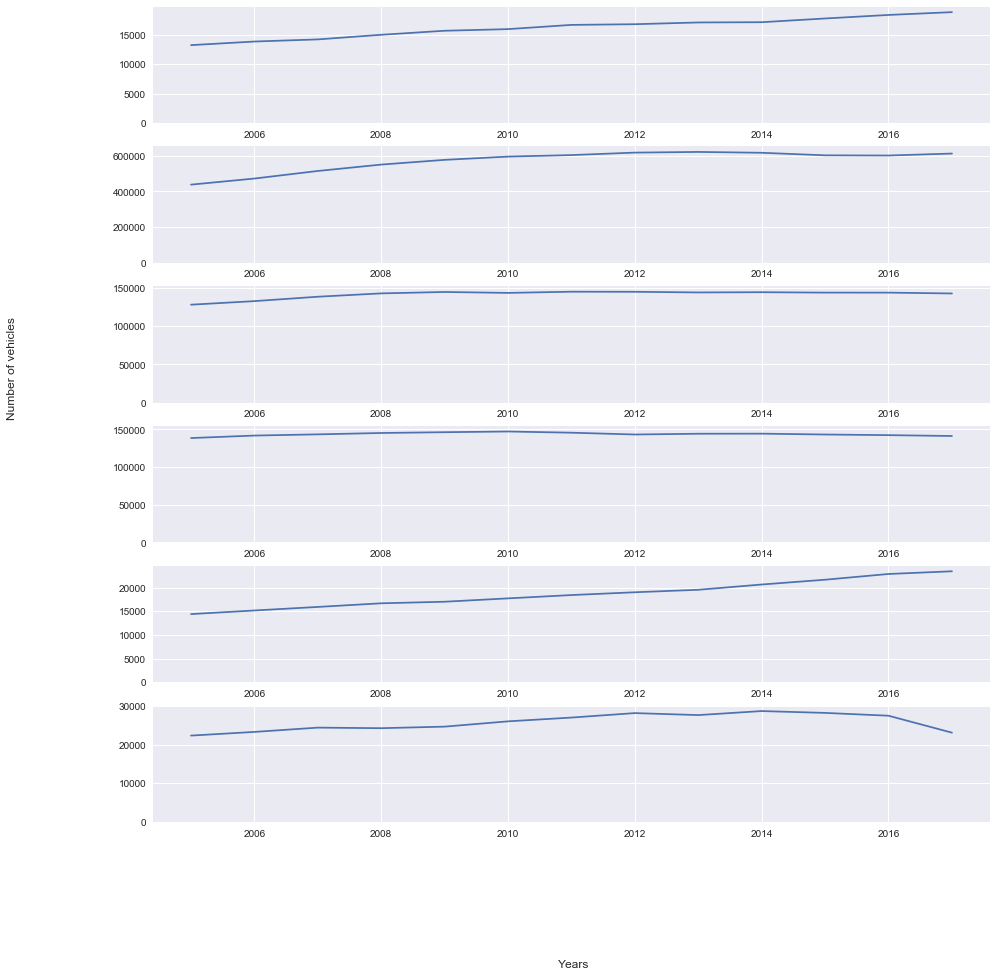

In [55]:
all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]
all_motor_cat = [[cat_year['number'].sum() for cat_year in utils.grpBy(cat, 'year')] for cat in all_motor_cat]

max_values = [np.max(cat_year) for cat_year in all_motor_cat]

all_motor_cat = [(year, cat_year) for (year, cat_year) in zip(years, all_motor_cat)]

fig, ax = utils.subplots(all_motor_cat, categories)
for a, max_value in zip(ax, max_values):
    a.set_ylim(0, max_value*1.05)

fig.text(0.5, -0.01, 'Years', fontdict = {'fontsize': 12})
fig.text(-0.01, 0.5, 'Number of vehicles', fontdict = {'fontsize': 12}, rotation='vertical')

# all_motor_cat

Text(-0.01, 0.5, 'Number of vehicles')

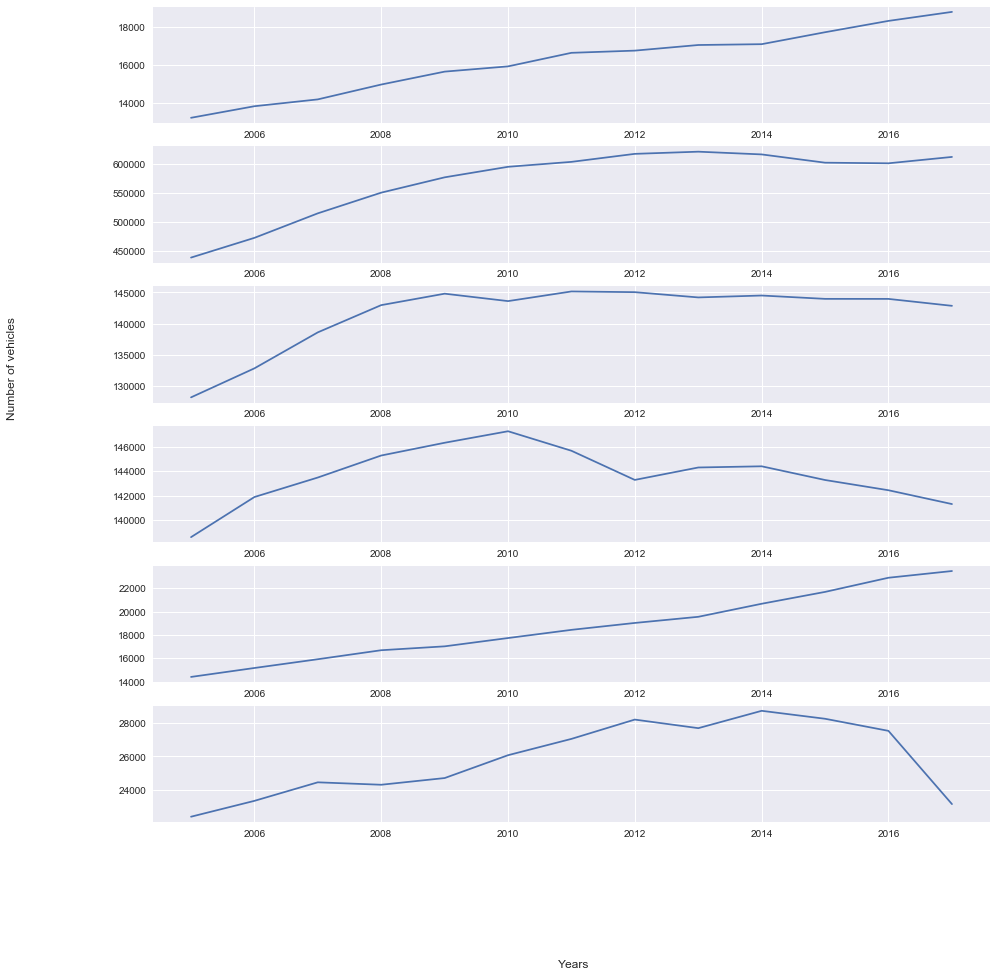

In [56]:
all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]
all_motor_cat = [[cat_year['number'].sum() for cat_year in utils.grpBy(cat, 'year')] for cat in all_motor_cat]

max_values = [np.max(cat_year) for cat_year in all_motor_cat]

all_motor_cat = [(year, cat_year) for (year, cat_year) in zip(years, all_motor_cat)]

fig, ax = utils.subplots(all_motor_cat, categories)
# for a, max_value in zip(ax, max_values):
#     a.set_ylim(0, max_value*1.05)

fig.text(0.5, -0.01, 'Years', fontdict = {'fontsize': 12})
fig.text(-0.01, 0.5, 'Number of vehicles', fontdict = {'fontsize': 12}, rotation='vertical')

# all_motor_cat

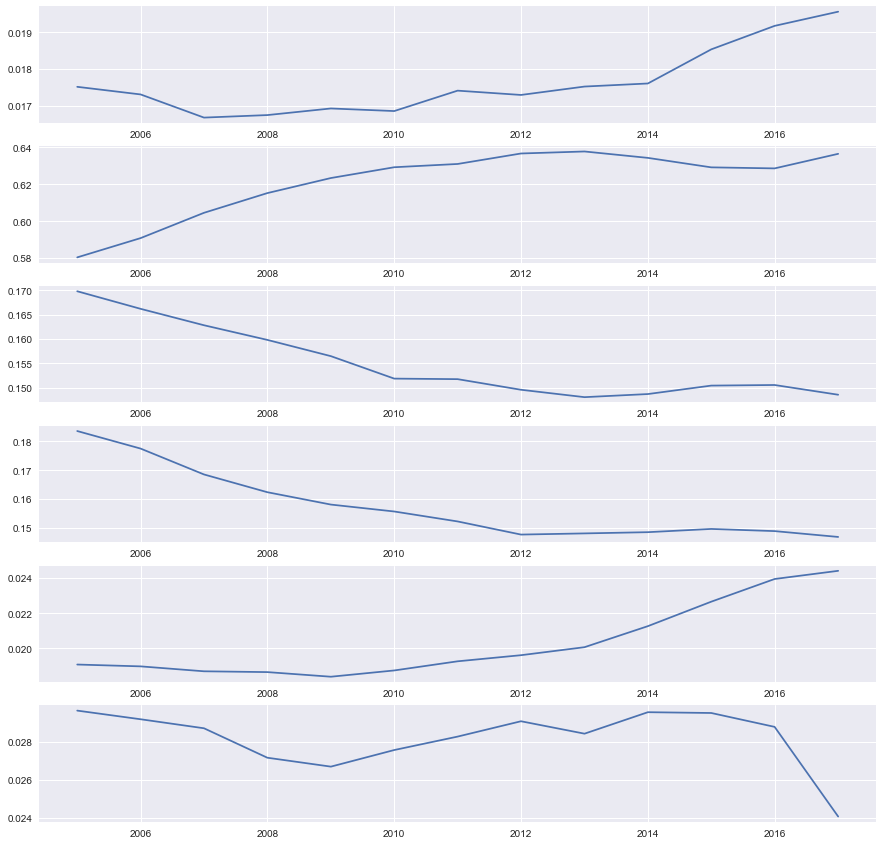

In [57]:
all_motor_year = utils.grpBy(all_motor_veh, 'year')
all_motor_year = [[year_cat['number'].sum() for year_cat in utils.grpBy(year, 'category')] for year in all_motor_year]
all_motor_year = np.array([year / np.sum(year) for year in all_motor_year])
# all_motor_year = [cat[:, i] for i in range(all_motor_year.shape[1])]
all_motor_year = all_motor_year.T


all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]
# all_motor_cat = [[cat_year['number'].sum() for cat_year in utils.grpBy(cat, 'year')] for cat in all_motor_cat]

# max_values = [np.max(cat_year) for cat_year in all_motor_cat]
    

all_motor_year = [(year, cat_year) for (year, cat_year) in zip(years, all_motor_year)]

fig, ax = utils.subplots(all_motor_year, categories)
# for a in ax:
#     a.set_ylim(0, 1)

# fig.text(0.5, -0.01, 'Years', fontdict = {'fontsize': 12})
# fig.text(-0.01, 0.5, 'Number of vehicles', fontdict = {'fontsize': 12}, rotation='vertical')

[Text(0, 0, 'Buses'),
 Text(0, 0, 'Cars & Station-wagons'),
 Text(0, 0, 'Goods & Other Vehicles'),
 Text(0, 0, 'Motorcycles and Scooters'),
 Text(0, 0, 'Tax Exempted Vehicles'),
 Text(0, 0, 'Taxis')]

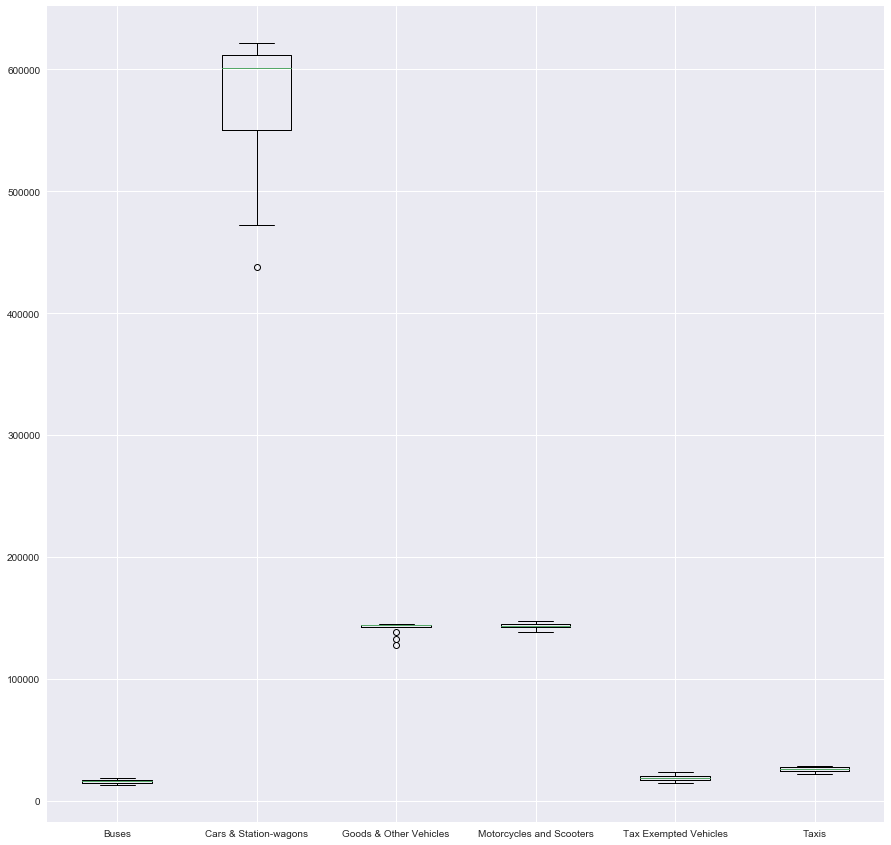

In [58]:
all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]
all_motor_cat = [[cat_year['number'].sum() for cat_year in utils.grpBy(cat, 'year')] for cat in all_motor_cat]

# all_motor_cat = [(year, cat_year) for (year, cat_year) in zip(years, all_motor_cat)]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.boxplot(all_motor_cat)
ax.set_xticklabels(categories)

[Text(0, 0, 'Cars & Station-wagons')]

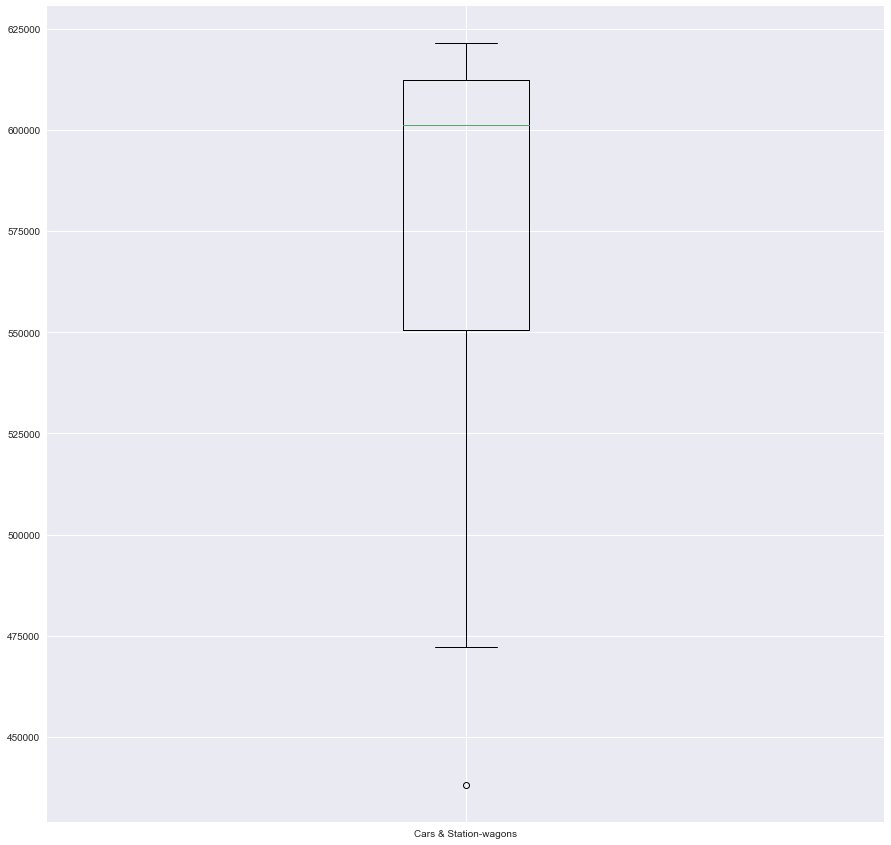

In [59]:
# Zoom in on the cars & station-wagons
all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]
all_motor_cat = [[cat_year['number'].sum() for cat_year in utils.grpBy(cat, 'year')] for cat in all_motor_cat]

# all_motor_cat = [(year, cat_year) for (year, cat_year) in zip(years, all_motor_cat)]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.boxplot([all_motor_cat[1]])
ax.set_xticklabels([categories[1]])

[Text(0, 0, 'Buses'),
 Text(0, 0, 'Goods & Other Vehicles'),
 Text(0, 0, 'Motorcycles and Scooters'),
 Text(0, 0, 'Tax Exempted Vehicles'),
 Text(0, 0, 'Taxis')]

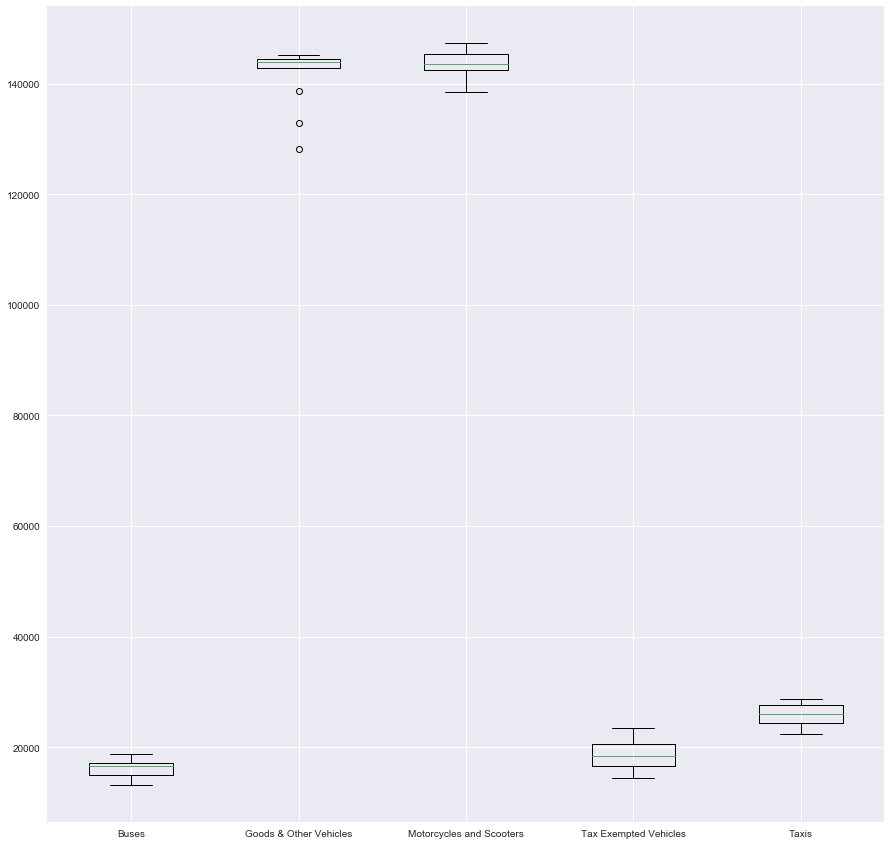

In [60]:
all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]
all_motor_cat = [[cat_year['number'].sum() for cat_year in utils.grpBy(cat, 'year')] for cat in all_motor_cat]

# all_motor_cat = [(year, cat_year) for (year, cat_year) in zip(years, all_motor_cat)]

all_motor_cat = [all_motor_cat[0]] + all_motor_cat[2:]
categories = [categories[0]] + categories[2:]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.boxplot(all_motor_cat)
ax.set_xticklabels(categories)

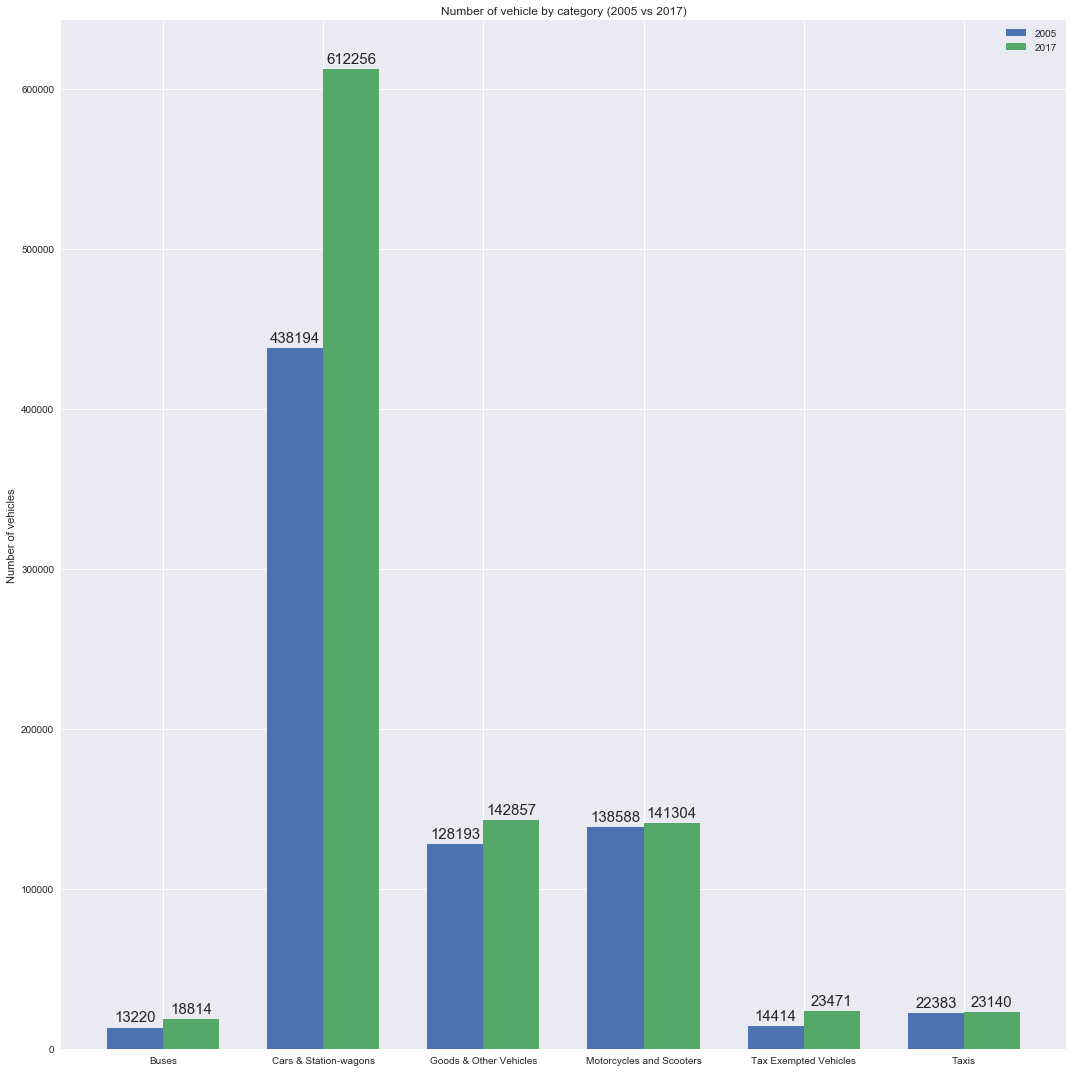

In [61]:
all_year = [year for year in utils.grpBy(all_motor_veh, 'year')]
first_all = all_year[0]
last_all = all_year[-1]
first_year = np.unique(first_all['year'])[0]
last_year = np.unique(last_all['year'])[0]
categories = [np.unique(cat['category'])[0] for cat in utils.grpBy(first_all, 'category')]
first_all = [cat['number'].sum() for cat in utils.grpBy(first_all, 'category')]
last_all= [cat['number'].sum() for cat in utils.grpBy(last_all, 'category')]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
first = ax.bar(x-width/2, first_all, width, label=first_year)
last = ax.bar(x+width/2, last_all, width, label=last_year)

ax.set_title('Number of vehicle by category ({} vs {})'.format(first_year, last_year))
ax.set_ylabel('Number of vehicles')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        text = ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        text.set_fontsize(15)
autolabel(first)
autolabel(last)

plt.tight_layout()

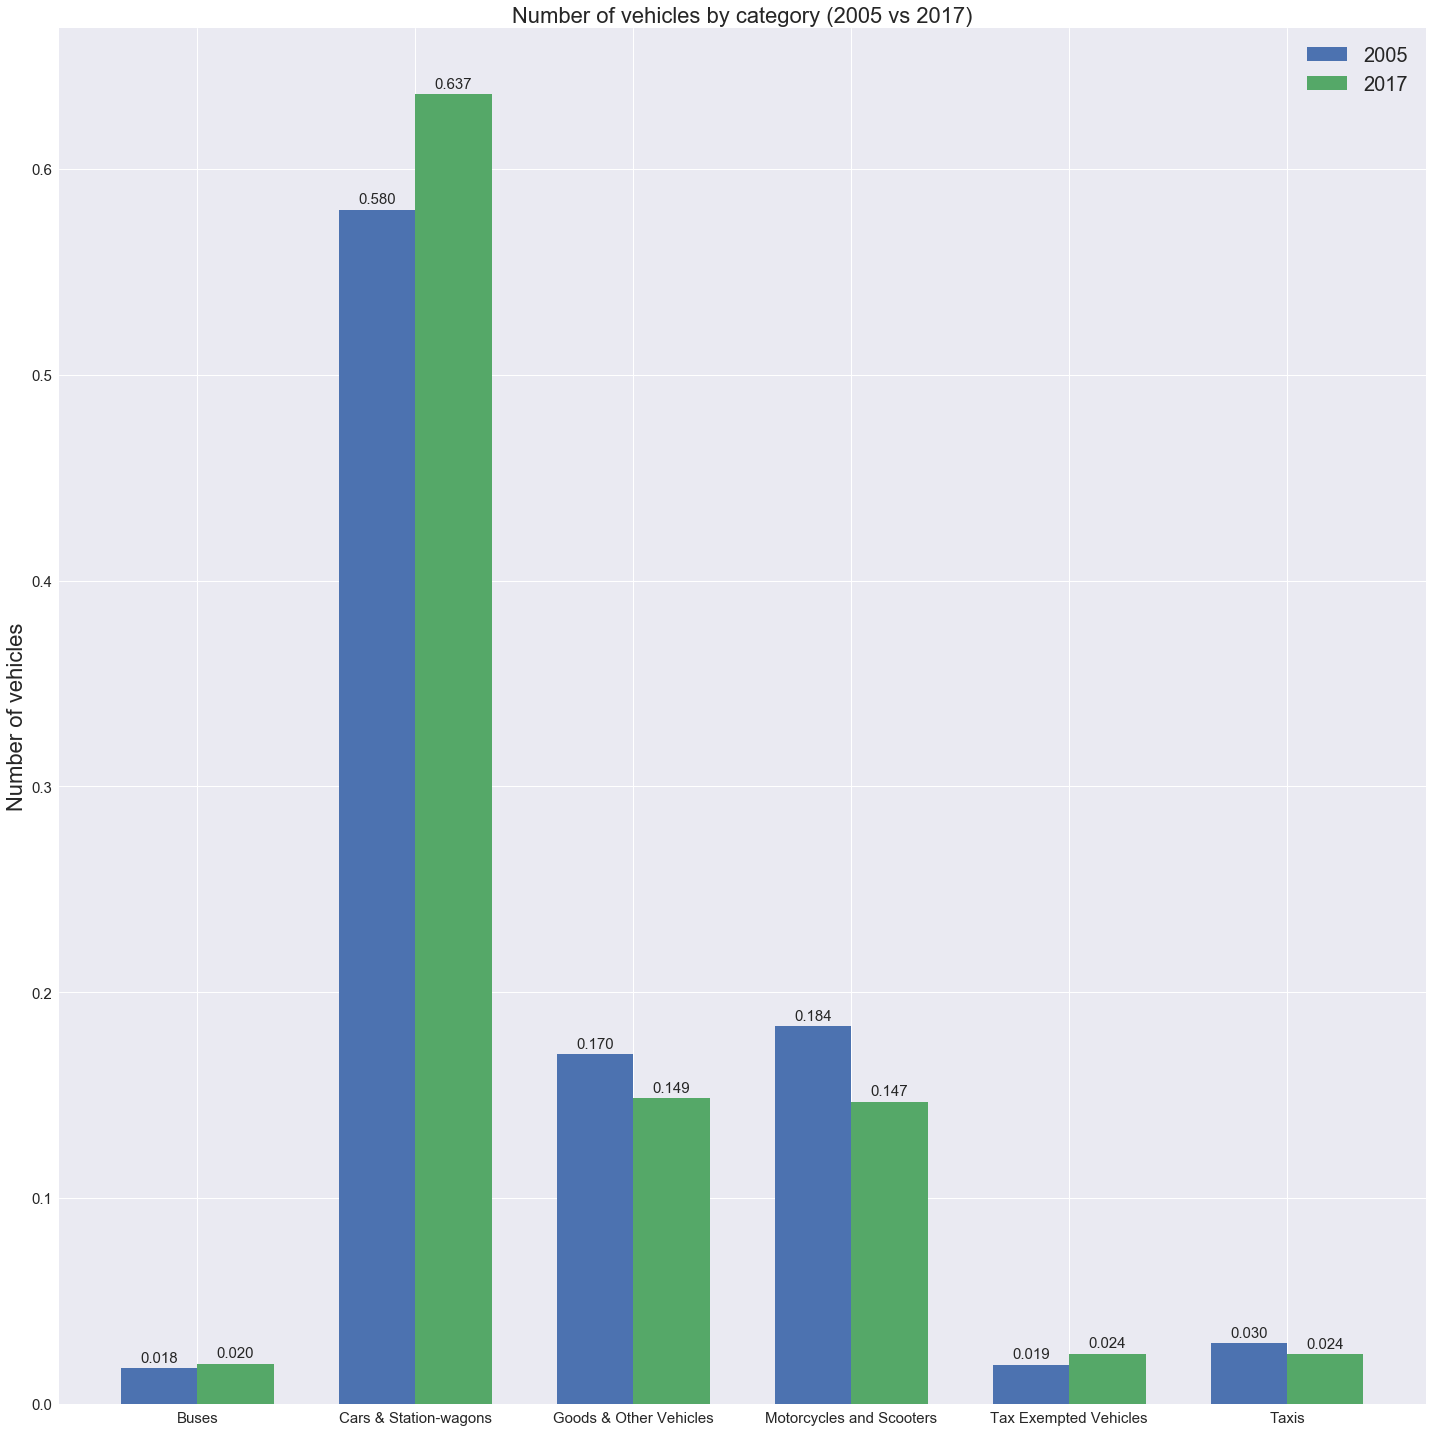

In [62]:
all_motor_year = utils.grpBy(all_motor_veh, 'year')
first_year = np.unique(all_motor_year[0]['year'])[0]
last_year = np.unique(all_motor_year[-1]['year'])[0]
all_motor_year = [[year_cat['number'].sum() for year_cat in utils.grpBy(year, 'category')] for year in all_motor_year]
all_motor_year = np.array([year / np.sum(year) for year in all_motor_year])
# all_motor_year = all_motor_year.T


all_motor_cat = utils.grpBy(all_motor_veh, 'category')
years = [np.unique(utils.convertColDate(cat, 'year')) for cat in all_motor_cat]
categories = [np.unique(cat['category']).tolist()[0] for cat in all_motor_cat]

first_all = all_motor_year[0]
last_all = all_motor_year[-1]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
first = ax.bar(x-width/2, first_all, width, label=first_year)
last = ax.bar(x+width/2, last_all, width, label=last_year)

text = ax.set_title('Number of vehicles by category ({} vs {})'.format(first_year, last_year))
text.set_fontsize(22)
text = ax.set_ylabel('Number of vehicles')
text.set_fontsize(22)
ax.set_xticks(x)
text = ax.set_xticklabels(categories)
for t in text:
    t.set_fontsize(14)
ax.legend(prop={'size':20})

ax.tick_params(axis='both', labelsize=15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        text = ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        text.set_fontsize(15)
autolabel(first)
autolabel(last)

plt.tight_layout()

(<Figure size 1080x1080 with 19 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2138c8ef0>,
       dtype=object))

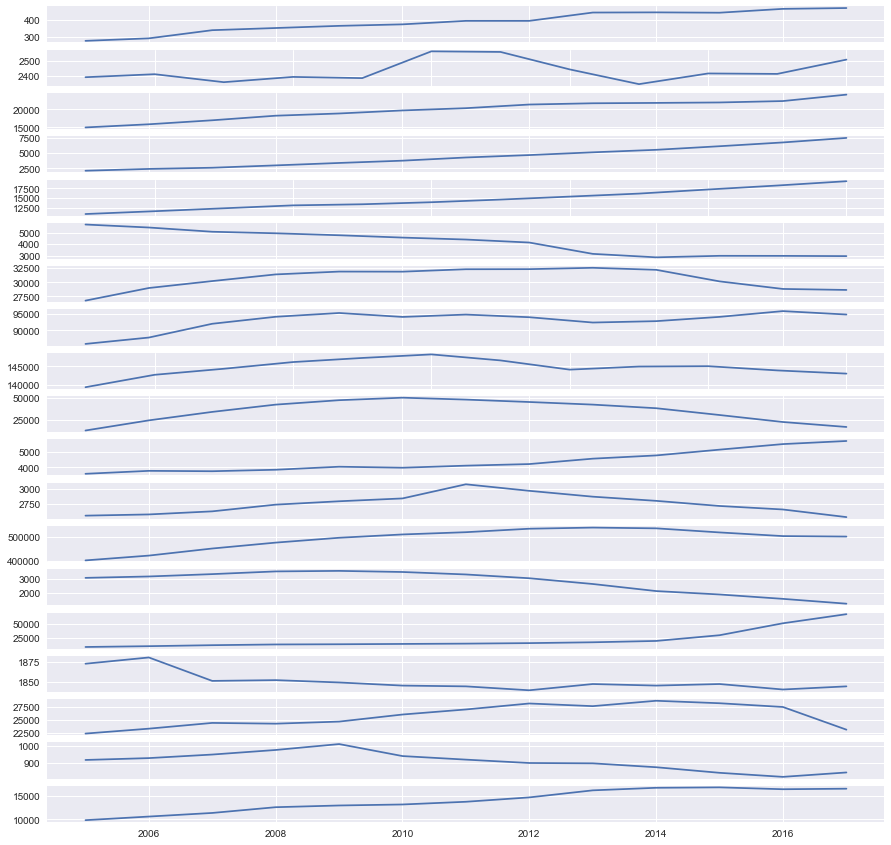

In [63]:
all_motor_type = utils.grpBy(all_motor_veh, 'type')
years = [np.unique(utils.convertColDate(year, 'year')) for year in all_motor_type]
all_motor_type = [[year['number'].sum() for year in utils.grpBy(motor_type, 'year')] for motor_type in all_motor_type]
types = np.unique(all_motor_veh['type'])
all_motor_type = [(year, motor_years, motor_type) for (year, motor_years, motor_type) in zip(all_motor_type, years, types) if len(year) > 2]

types = [motor_type for (year, motor_year, motor_type) in all_motor_type]
all_motor_type = [(motor_year, year) for (year, motor_year, motor_type) in all_motor_type]

utils.subplots(all_motor_type, types)
# all_motor_type